In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('../data/clean_2.csv')
df.head()

,exports,imports,industrial production growth rate,investment,unemployement rate,gdp
0,0.126491,0.024505,0.280423,0.161121,0.351585,0.026382
1,0.181904,0.062921,0.375661,0.194396,0.110951,0.119814
2,0.146305,0.082021,0.330688,0.217163,0.040346,0.021420
3,0.085787,0.031111,0.343915,0.166375,0.053314,0.015557
4,0.353292,0.173487,0.259259,0.199650,0.092219,0.087047


In [23]:
class KMeans:
    def __init__(self, X, cluster_num, centroid_init):
        self.K = cluster_num
        self.max_iter = 100
        self.example_num, self.feature_num = X.shape
        self.should_plot = True
        self.show_result = True
        self.centroid_init = centroid_init

    def init_centroid(self, centroid_init, k, X):
        if(self.centroid_init == 'random'): 
            initial_centroids = np.random.permutation(X.shape[0])[:self.K]
            self.centroids = X[initial_centroids]
        elif(self.centroid_init == 'firstk'):
            self.centroids = X[:self.K]
        else:
            for i in range(self.K):
                self.centroids.append(i%self.K)
        return self.centroids 
    
    def euclidean_distance(self, X):
        dist = np.zeros((self.example_num, self.K))
        for idx, centroid in enumerate(self.centroids):
            dist[:, idx] = np.sqrt(np.sum((X - centroid) ** 2, axis=1))
        return dist
    
    def create_cluster(self, X, centroid):
        cluster = [[] for _ in range(self.K)]
        dist = self.euclidean_distance(X)
        if dist.size == 0:  # Check if dist is empty
            return cluster
        cluster_idx = np.argmin(dist, axis=1)
        for idx, sample in enumerate(X):
            cluster[cluster_idx[idx]].append(idx)
        return cluster
    
    def calculate_centroid(self, cluster, X):
        centroid = np.zeros((self.K, X.shape[1]))
        for idx, clusters in enumerate(cluster):
            centroid[idx] = np.mean(X[clusters], axis=0)
        return centroid

    
    def predict(self, cluster, X):
        y_pred = np.zeros(self.example_num)
        for cluster_idx, clusters in enumerate(cluster):
            for sample_idx in clusters:
                y_pred[sample_idx] = cluster_idx
        return y_pred

    def inertia(self, X):
        if self.centroids is None:
            raise ValueError("Centroids have not been trained. Call fit() method first.")
        
        cluster = self.create_cluster(X, self.centroids)
        cluster_labels = self.predict(cluster, X)
        inertia_val = 0.0
        for i in range(self.K):
            cluster_samples = X[cluster_labels == i]
            centroid = self.centroids[i]
            squared_distances = np.sum((cluster_samples - centroid) ** 2, axis=1)
            inertia_val += np.sum(squared_distances)
        
        return inertia_val
    
    def plot_clusters(self, X, y, centroids):
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='black')
        plt.title("Iteration: {}".format(self.iteration))
        plt.show()

    def fit(self, X):
        self.centroids = self.init_centroid(self.centroid_init, self.K, X)
        prev_diff = None  # Variable to store the previous displacement
        for i in range(self.max_iter):
            cluster = self.create_cluster(X, self.centroids)
            prev_centroid = self.centroids
            self.centroids = self.calculate_centroid(cluster, X)
            diff = self.centroids - prev_centroid
            if np.array_equal(self.centroids, prev_centroid):
                break

            prev_diff = diff  # Update the previous displacement
            self.iteration = i + 1
            if self.show_result:
                print('Inertia value after {} iterations'.format(str(self.iteration)))
                print(self.inertia(X))
                print(f"Iteration: {self.iteration}")
                print("Centroids:")
                print(self.centroids)
            if self.should_plot:
                self.plot_clusters(X, self.predict(cluster, X), self.centroids)
        return self.predict(cluster, X)
    
    def calculate_sse(self, X):
        if self.centroids is None:
            raise ValueError("Centroids have not been trained. Call fit() method first.")

        cluster = self.create_cluster(X, self.centroids)
        cluster_labels = self.predict(cluster, X)
        sse = 0.0
        for i in range(self.K):
            cluster_samples = X[cluster_labels == i]
            centroid = self.centroids[i]
            squared_distances = np.sum((cluster_samples - centroid) ** 2, axis=1)
            sse += np.sum(squared_distances)

        return sse


Inertia value after 1 iterations
2.68052859573808
Iteration: 1
Centroids:
[[0.00621032 0.00206562 0.19753086 0.3987157 ]
 [0.01546733 0.0084998  0.387453   0.141064  ]
 [0.01222321 0.00835226 0.34532116 0.29514222]
 [0.177066   0.09878013 0.35641306 0.23370977]]


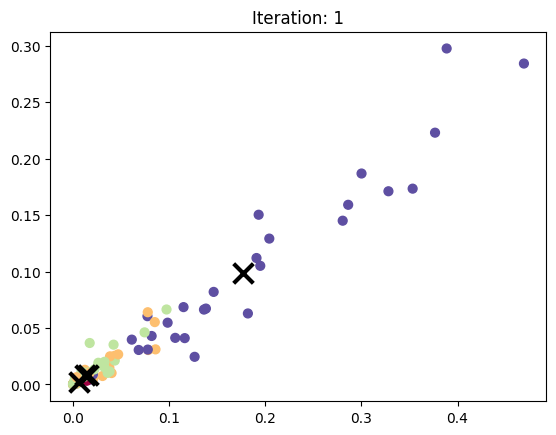

Inertia value after 2 iterations
2.452458225484153
Iteration: 2
Centroids:
[[0.0102204  0.00560949 0.2669927  0.42356768]
 [0.01641784 0.00877182 0.37777665 0.14381011]
 [0.01668271 0.0109163  0.36296803 0.28701348]
 [0.22526432 0.12602037 0.33887629 0.22483529]]


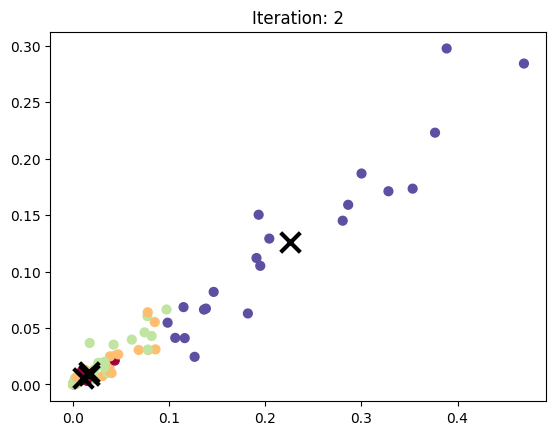

Inertia value after 3 iterations
2.3339079258049558
Iteration: 3
Centroids:
[[0.00801929 0.00440879 0.29274702 0.42673672]
 [0.02116235 0.01026214 0.36290121 0.14458385]
 [0.02148441 0.01316366 0.3786305  0.28636932]
 [0.25918089 0.15115401 0.33101852 0.23040718]]


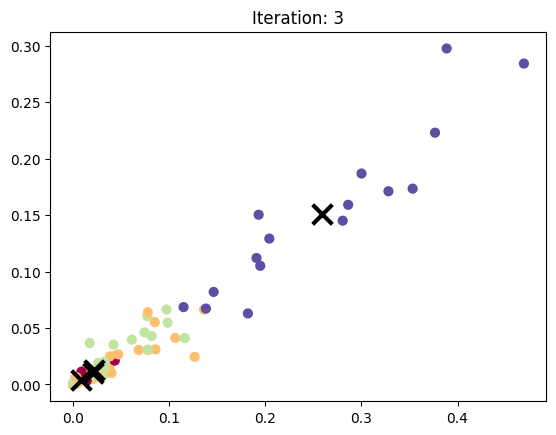

Inertia value after 4 iterations
2.238968600828988
Iteration: 4
Centroids:
[[0.01233233 0.007305   0.32538037 0.42600701]
 [0.02213301 0.01071795 0.35003422 0.14369527]
 [0.02423566 0.01455034 0.39107993 0.2750373 ]
 [0.27812064 0.16304828 0.32331822 0.22792094]]


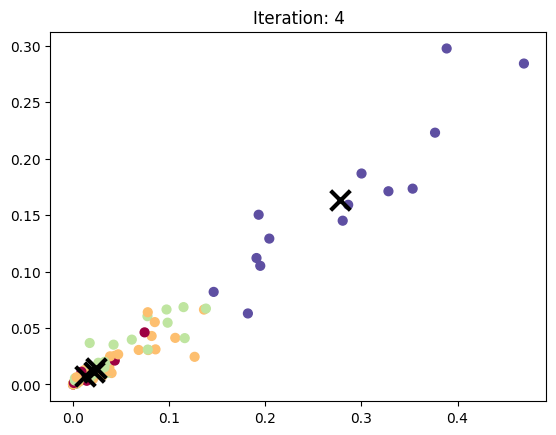

Inertia value after 5 iterations
2.0964280768745986
Iteration: 5
Centroids:
[[0.01292202 0.00788488 0.34805846 0.42619465]
 [0.0215558  0.00990203 0.3272111  0.1460837 ]
 [0.0283773  0.01717736 0.41347369 0.26270918]
 [0.28453166 0.16750398 0.30972731 0.21931833]]


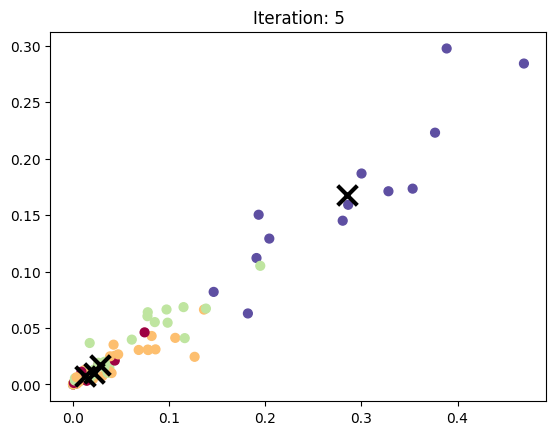

Inertia value after 6 iterations
1.9653357425345948
Iteration: 6
Centroids:
[[0.01321682 0.00980911 0.34584222 0.41996497]
 [0.02178571 0.01072965 0.30197545 0.15163731]
 [0.03260403 0.01820993 0.43136466 0.24407757]
 [0.30561339 0.18031783 0.28787879 0.22353128]]


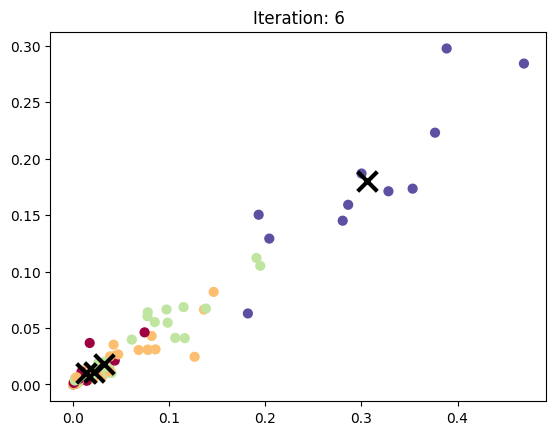

Inertia value after 7 iterations
1.8927796983594443
Iteration: 7
Centroids:
[[0.01676208 0.0120113  0.33937456 0.39616555]
 [0.02481141 0.01254489 0.2944572  0.15674256]
 [0.03244927 0.01704207 0.4433438  0.23231052]
 [0.31798436 0.1920575  0.27910053 0.22644483]]


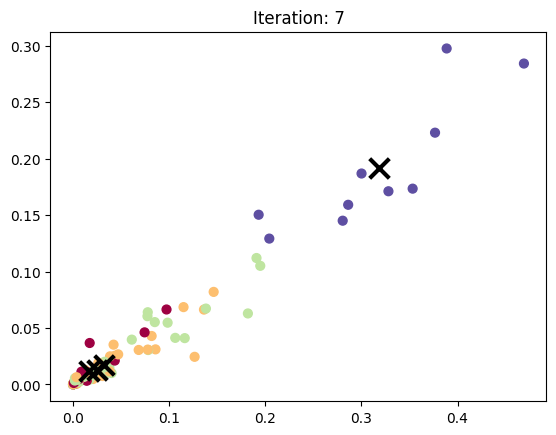

Inertia value after 8 iterations
1.8513956138162726
Iteration: 8
Centroids:
[[0.01440481 0.00990095 0.34379081 0.37168261]
 [0.02577672 0.01300811 0.29113164 0.15569177]
 [0.03455826 0.01817794 0.45278432 0.22036884]
 [0.31798436 0.1920575  0.27910053 0.22644483]]


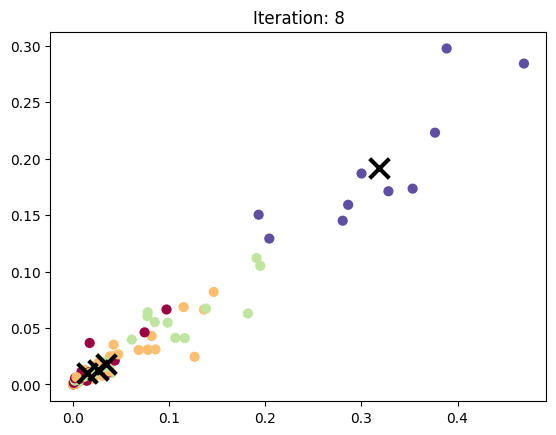

Inertia value after 9 iterations
1.8426449010285566
Iteration: 9
Centroids:
[[0.01461942 0.01004983 0.34424834 0.36007005]
 [0.02617879 0.01313612 0.2895937  0.1528923 ]
 [0.03531976 0.01842605 0.45631012 0.21522888]
 [0.31798436 0.1920575  0.27910053 0.22644483]]


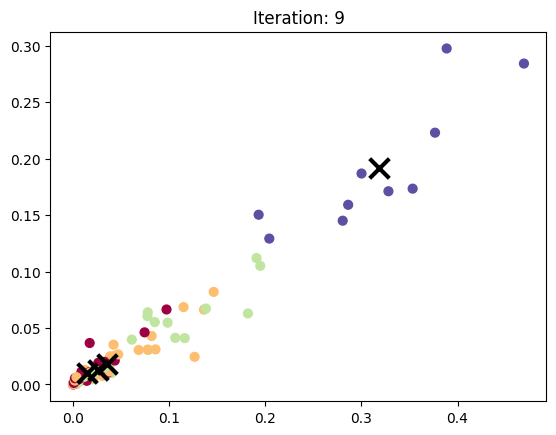

Inertia value after 10 iterations
1.838847258955459
Iteration: 10
Centroids:
[[0.01398859 0.00965999 0.34563295 0.35392951]
 [0.02617879 0.01313612 0.2895937  0.1528923 ]
 [0.03663012 0.01904791 0.460136   0.21324622]
 [0.31798436 0.1920575  0.27910053 0.22644483]]


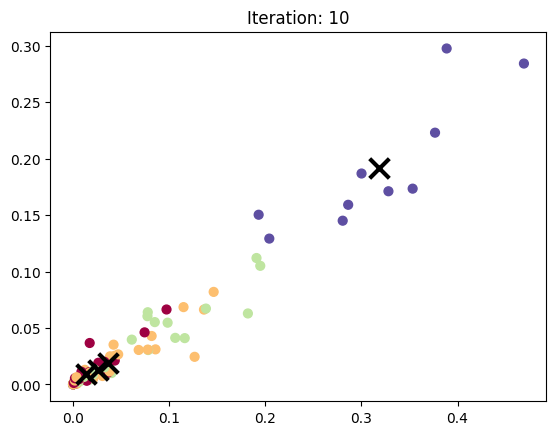

Inertia value after 11 iterations
1.8303832658151398
Iteration: 11
Centroids:
[[0.01423783 0.00977233 0.34614207 0.35084647]
 [0.02514755 0.01262599 0.29287373 0.15458747]
 [0.03860469 0.02002543 0.46638112 0.21317819]
 [0.31798436 0.1920575  0.27910053 0.22644483]]


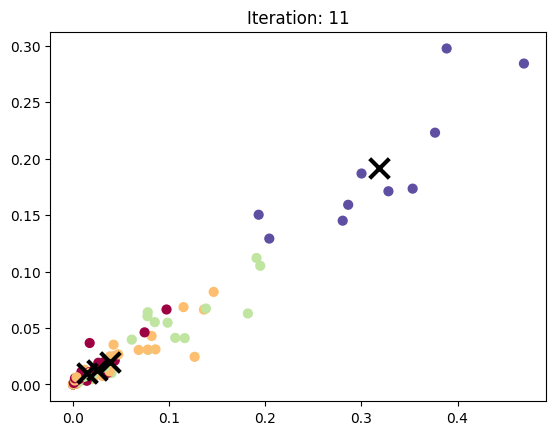

Inertia value after 12 iterations
1.812571242853606
Iteration: 12
Centroids:
[[0.01378239 0.00957938 0.3486953  0.34605954]
 [0.02541956 0.01256217 0.29917578 0.15659571]
 [0.04133664 0.02161236 0.47966621 0.21365512]
 [0.31798436 0.1920575  0.27910053 0.22644483]]


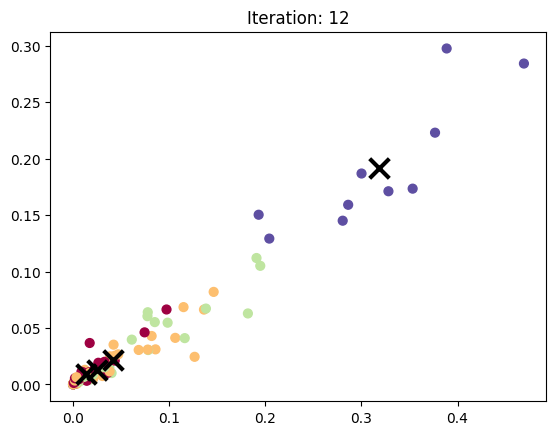

Inertia value after 13 iterations
1.7952239865149775
Iteration: 13
Centroids:
[[0.01311021 0.00906706 0.35047091 0.33774618]
 [0.02541956 0.01256217 0.29917578 0.15659571]
 [0.04442822 0.0232     0.48896447 0.21133211]
 [0.31798436 0.1920575  0.27910053 0.22644483]]


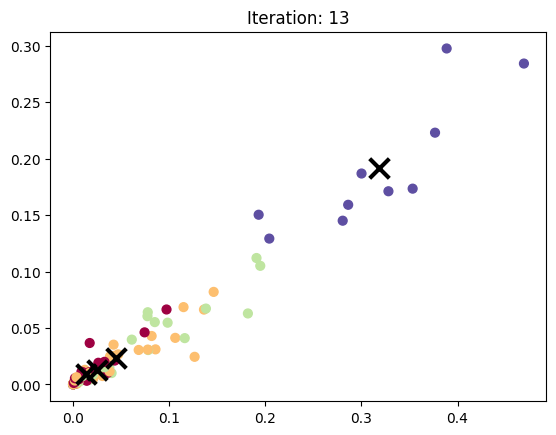

Inertia value after 14 iterations
1.770912685381051
Iteration: 14
Centroids:
[[0.01680425 0.0107604  0.34858681 0.3251976 ]
 [0.02586341 0.01273324 0.2981819  0.15500777]
 [0.0421654  0.02212834 0.50446429 0.21291989]
 [0.31798436 0.1920575  0.27910053 0.22644483]]


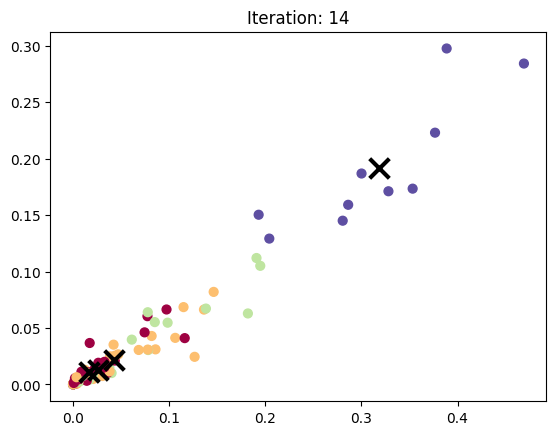

Inertia value after 15 iterations
1.7593659244854911
Iteration: 15
Centroids:
[[0.01870418 0.01186291 0.3489156  0.32199844]
 [0.026277   0.01222756 0.30316383 0.15570769]
 [0.04134333 0.02287219 0.52003023 0.21268903]
 [0.31798436 0.1920575  0.27910053 0.22644483]]


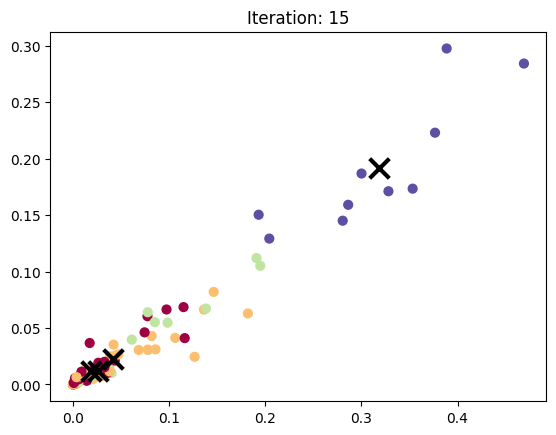

Inertia value after 16 iterations
1.7565430186504816
Iteration: 16
Centroids:
[[0.01798875 0.01141378 0.35249391 0.31934398]
 [0.026277   0.01222756 0.30316383 0.15570769]
 [0.04435057 0.02451367 0.52686203 0.20897698]
 [0.31798436 0.1920575  0.27910053 0.22644483]]


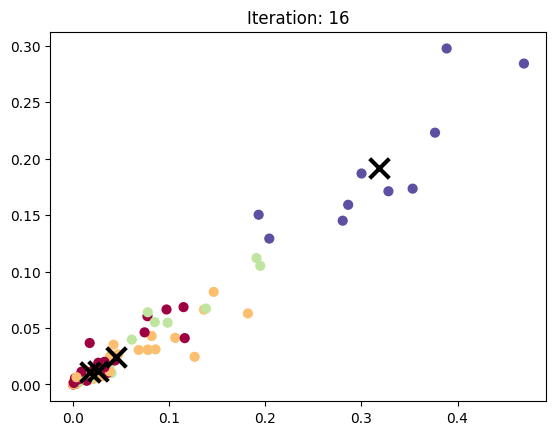

Sum of Squared Errors (SSE): 1.7565430186504816


In [24]:
if __name__ == '__main__':
    np.random.seed(42)
    cluster_num = 4
    X = df[df.columns[:4]].values
    Kmeans = KMeans(X, cluster_num, centroid_init='random')
    y_pred = Kmeans.fit(X)
    sse = Kmeans.calculate_sse(X)
    print("Sum of Squared Errors (SSE):", sse)

Inertia value after 1 iterations
4.498631137562734
Iteration: 1
Centroids:
[[0.04821661 0.02741226 0.36042444 0.22592406]]


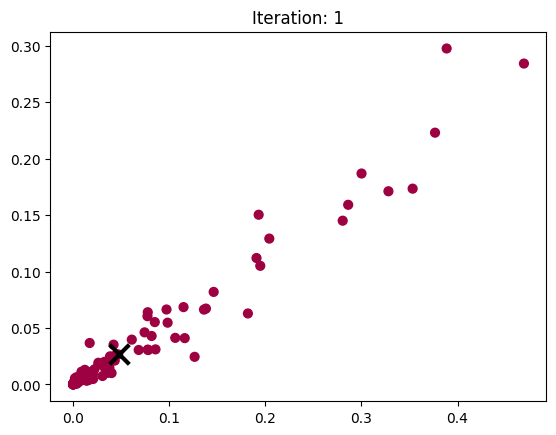

Inertia value after 1 iterations
3.5994123285166038
Iteration: 1
Centroids:
[[0.01618723 0.00922334 0.32935212 0.23507158]
 [0.13166159 0.07479919 0.44137604 0.20209236]]


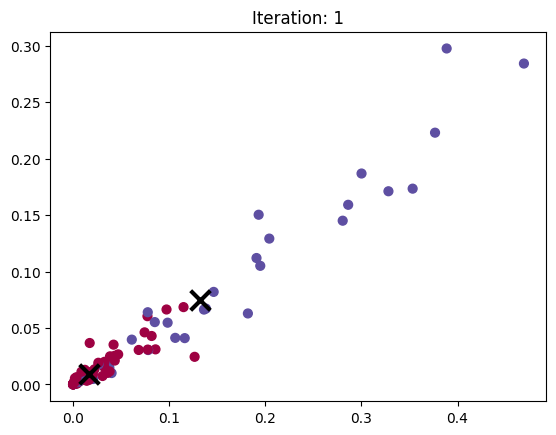

Inertia value after 2 iterations
3.56567346623799
Iteration: 2
Centroids:
[[0.01539399 0.00856844 0.32745874 0.22596079]
 [0.1369264  0.07834152 0.44952095 0.22582477]]


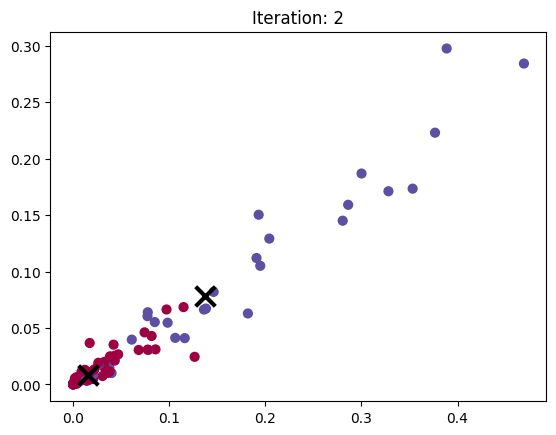

Inertia value after 3 iterations
3.5648838268305036
Iteration: 3
Centroids:
[[0.01537995 0.00861318 0.32600984 0.22560741]
 [0.13376476 0.07638882 0.45008354 0.22674901]]


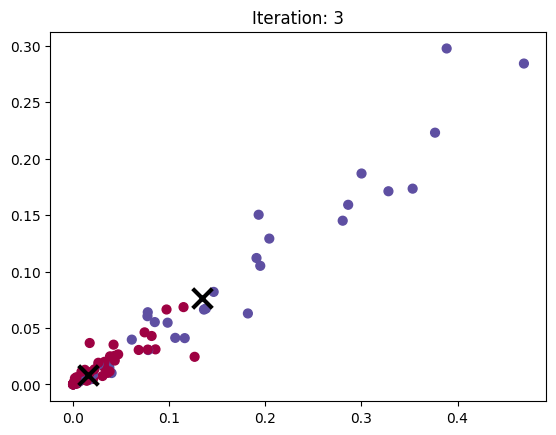

Inertia value after 1 iterations
2.948060003443482
Iteration: 1
Centroids:
[[0.04960229 0.02766582 0.32423914 0.19755338]
 [0.02902891 0.02174826 0.30347025 0.38594571]
 [0.05540797 0.03016346 0.54464286 0.23390778]]


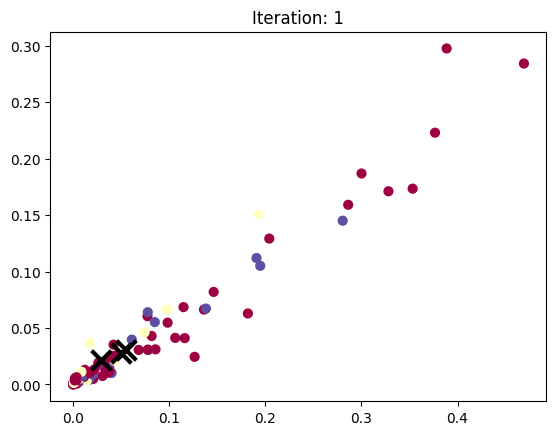

Inertia value after 2 iterations
2.857717475929691
Iteration: 2
Centroids:
[[0.05556221 0.03148508 0.31764776 0.18585842]
 [0.01418032 0.00980829 0.32504146 0.35989492]
 [0.05505523 0.03003382 0.53622304 0.23632441]]


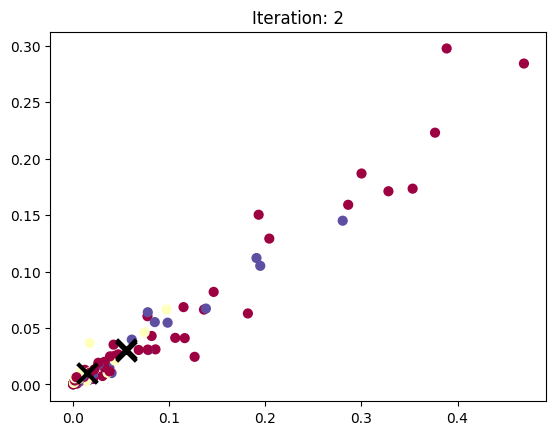

Inertia value after 3 iterations
2.8158831227293426
Iteration: 3
Centroids:
[[0.06003686 0.033975   0.31170599 0.17716839]
 [0.01426084 0.00960766 0.33234357 0.34372446]
 [0.0512478  0.02797234 0.52796674 0.23726997]]


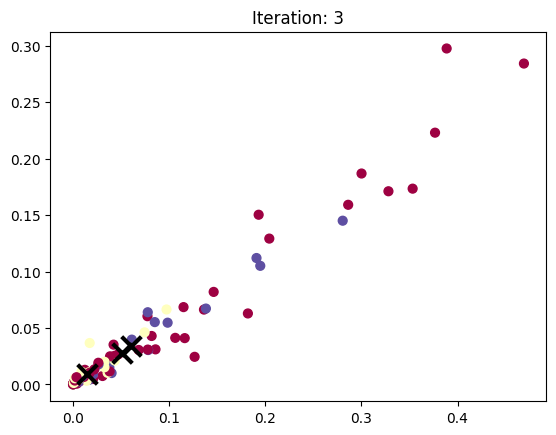

Inertia value after 4 iterations
2.769854684095095
Iteration: 4
Centroids:
[[0.06313231 0.03567528 0.30437072 0.16856735]
 [0.01858226 0.01185687 0.33942791 0.32815828]
 [0.0495082  0.02702865 0.52444809 0.23591233]]


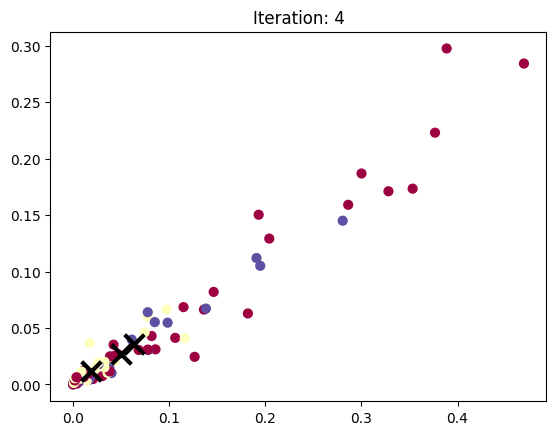

Inertia value after 5 iterations
2.747310943730877
Iteration: 5
Centroids:
[[0.06947936 0.03917757 0.29645239 0.16374781]
 [0.01675166 0.01074718 0.34312564 0.31629084]
 [0.04795586 0.02619956 0.52169312 0.22904099]]


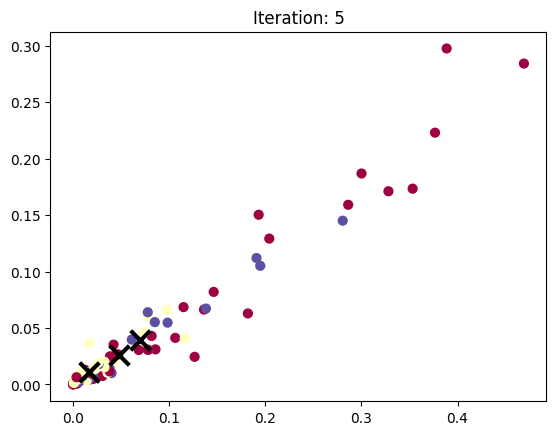

Inertia value after 6 iterations
2.739949943455547
Iteration: 6
Centroids:
[[0.07058109 0.03979708 0.29494315 0.16301115]
 [0.01575849 0.01011615 0.34800806 0.31157728]
 [0.05122061 0.02796147 0.52815571 0.22676209]]


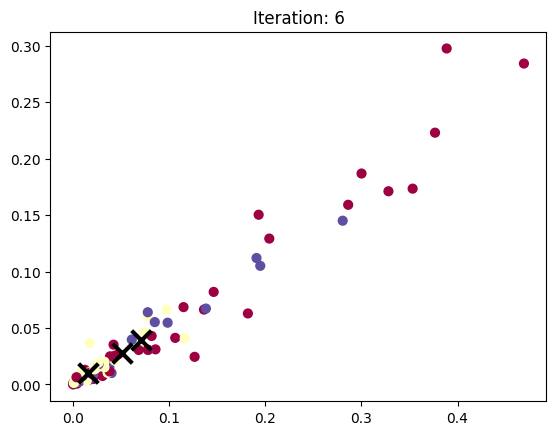

Inertia value after 7 iterations
2.730394300251742
Iteration: 7
Centroids:
[[0.07394752 0.04171194 0.29203322 0.16065382]
 [0.01499281 0.00958863 0.34832237 0.30536791]
 [0.05122061 0.02796147 0.52815571 0.22676209]]


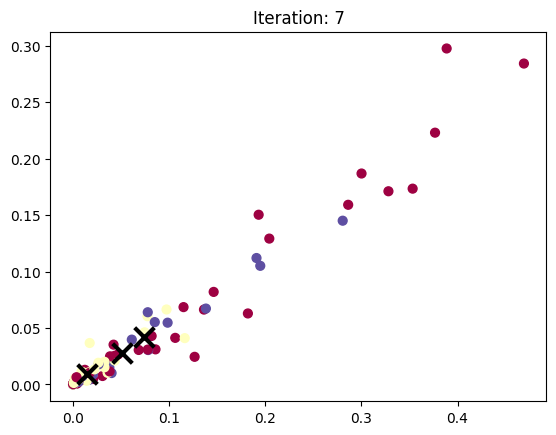

Inertia value after 8 iterations
2.724410566926888
Iteration: 8
Centroids:
[[0.07911391 0.04463811 0.2892757  0.15705529]
 [0.01398339 0.00892122 0.34698773 0.29824832]
 [0.05122061 0.02796147 0.52815571 0.22676209]]


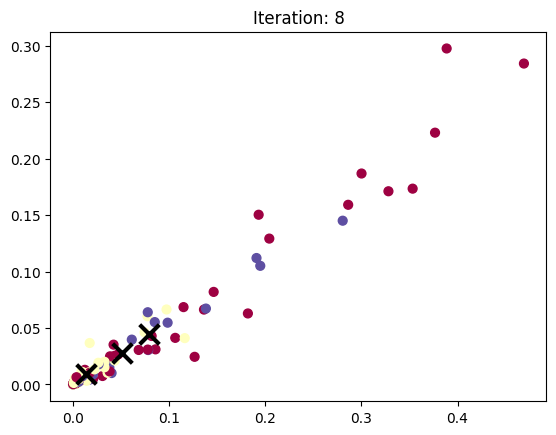

Inertia value after 1 iterations
2.78172718863964
Iteration: 1
Centroids:
[[0.09585048 0.05634055 0.33565599 0.30984513]
 [0.01594271 0.00885036 0.34268002 0.12634476]
 [0.016337   0.00774201 0.33435117 0.20361812]
 [0.03399476 0.01889661 0.52262278 0.13251605]]


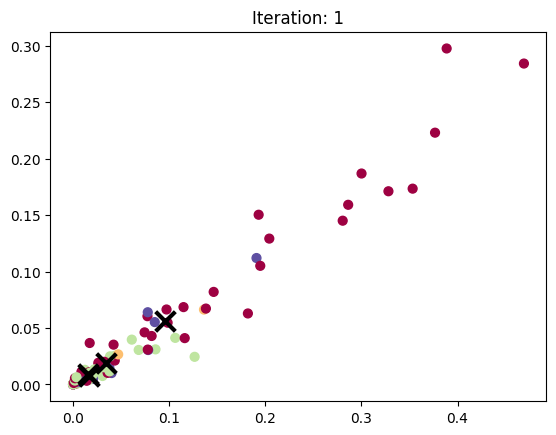

Inertia value after 2 iterations
2.515761903071549
Iteration: 2
Centroids:
[[0.11699818 0.06895321 0.3485657  0.31856392]
 [0.01462002 0.00788773 0.30783354 0.10642597]
 [0.0173133  0.00837388 0.33050009 0.22799752]
 [0.0348902  0.01935864 0.55085244 0.18656083]]


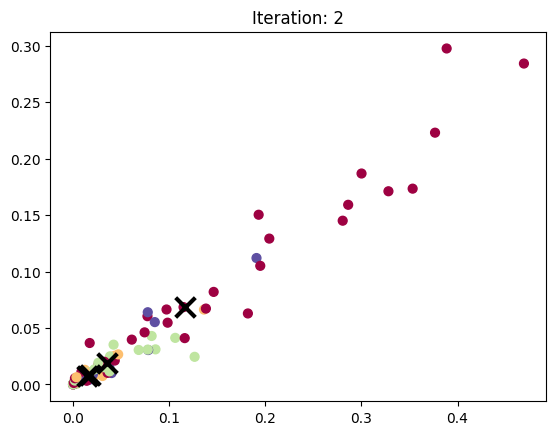

Inertia value after 3 iterations
2.193294082942414
Iteration: 3
Centroids:
[[0.16701721 0.09753863 0.31745272 0.30452647]
 [0.01773538 0.0079174  0.29513467 0.11677306]
 [0.0148094  0.00862648 0.34271241 0.25004194]
 [0.03884029 0.02153185 0.5499038  0.22325046]]


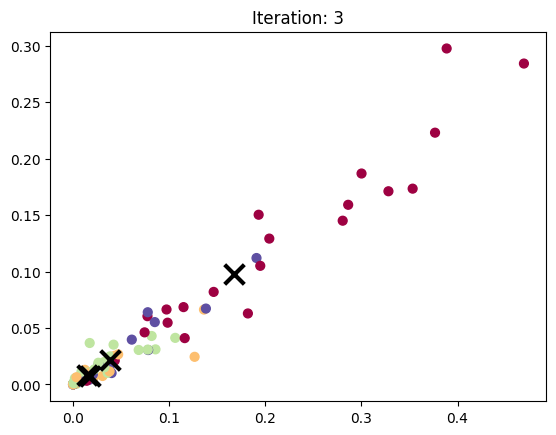

Inertia value after 4 iterations
1.8425176156859093
Iteration: 4
Centroids:
[[0.24151122 0.14075606 0.30999066 0.24817142]
 [0.02168393 0.00998786 0.29503379 0.13000135]
 [0.01355637 0.0084644  0.34752723 0.28391727]
 [0.03884029 0.02153185 0.5499038  0.22325046]]


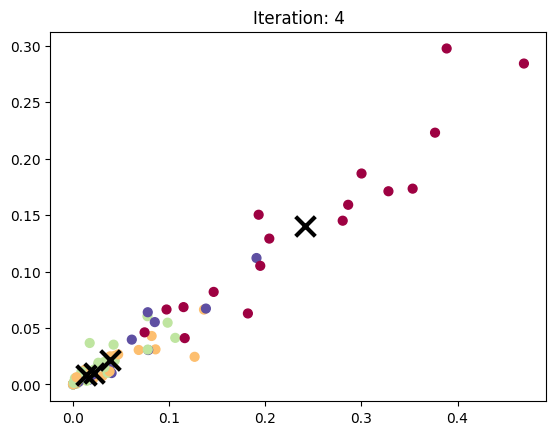

Inertia value after 5 iterations
1.7710783546889952
Iteration: 5
Centroids:
[[0.29233769 0.17212639 0.29144621 0.22300058]
 [0.02015792 0.00946387 0.29835044 0.13554352]
 [0.0200266  0.01193546 0.34667529 0.29145682]
 [0.04562017 0.0251663  0.54773407 0.22831586]]


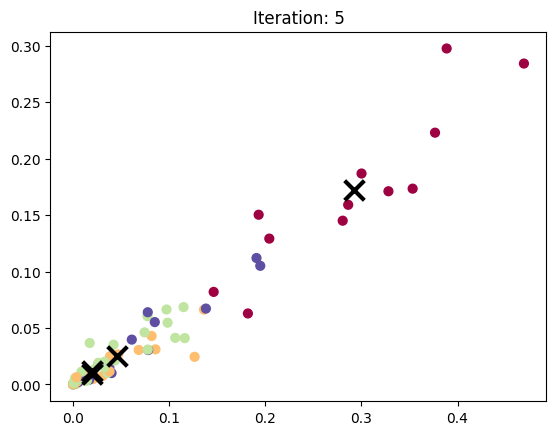

Inertia value after 6 iterations
1.7656583467472
Iteration: 6
Centroids:
[[0.30561339 0.18031783 0.28787879 0.22353128]
 [0.01927969 0.00906027 0.30160573 0.13819809]
 [0.02288067 0.01354219 0.34554036 0.29349263]
 [0.04562017 0.0251663  0.54773407 0.22831586]]


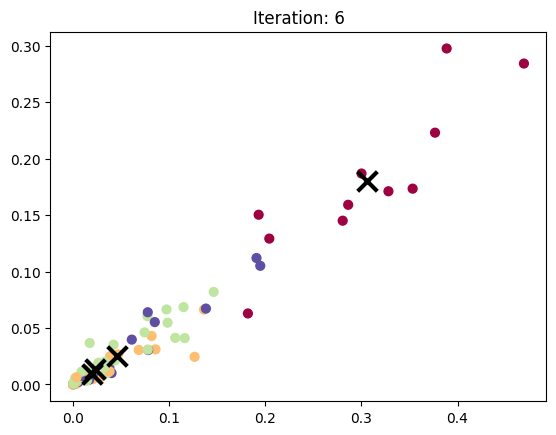

Inertia value after 7 iterations
1.7648476476772046
Iteration: 7
Centroids:
[[0.30561339 0.18031783 0.28787879 0.22353128]
 [0.01889384 0.00889405 0.30223795 0.1398005 ]
 [0.02325523 0.01375496 0.34580093 0.29492392]
 [0.04562017 0.0251663  0.54773407 0.22831586]]


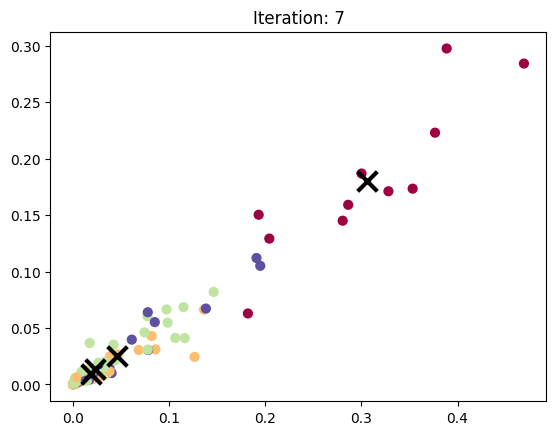

Inertia value after 8 iterations
1.7639281026508424
Iteration: 8
Centroids:
[[0.30561339 0.18031783 0.28787879 0.22353128]
 [0.01852398 0.00872546 0.30371362 0.14114841]
 [0.02364353 0.01398326 0.34534033 0.2965627 ]
 [0.04562017 0.0251663  0.54773407 0.22831586]]


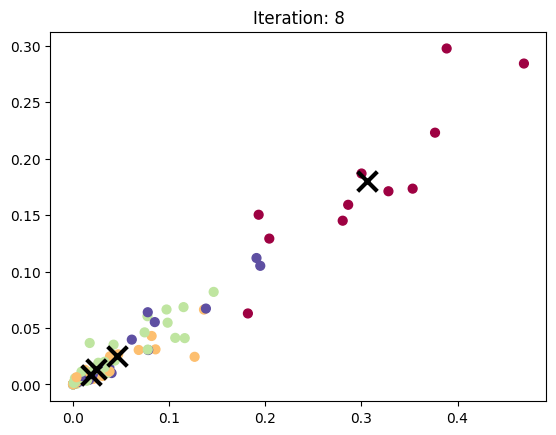

Inertia value after 9 iterations
1.762056583792391
Iteration: 9
Centroids:
[[0.30561339 0.18031783 0.28787879 0.22353128]
 [0.01793621 0.00844135 0.3053545  0.14410808]
 [0.0243665  0.0144358  0.34539311 0.29963316]
 [0.04562017 0.0251663  0.54773407 0.22831586]]


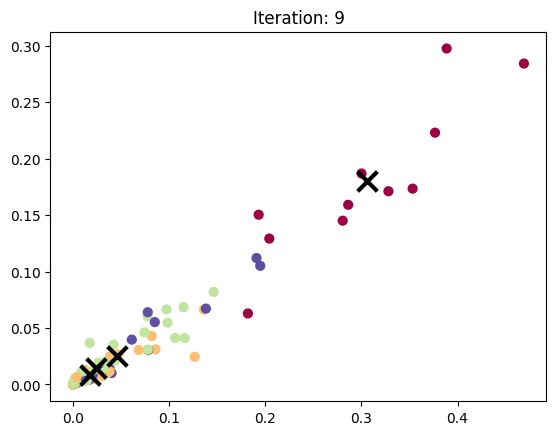

Inertia value after 10 iterations
1.7520680892837128
Iteration: 10
Centroids:
[[0.31798436 0.1920575  0.27910053 0.22644483]
 [0.02252431 0.00997405 0.30676517 0.14815439]
 [0.02317893 0.01418134 0.34687445 0.30253566]
 [0.04562017 0.0251663  0.54773407 0.22831586]]


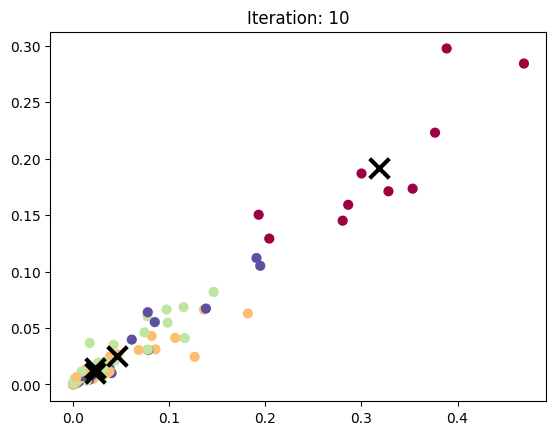

Inertia value after 11 iterations
1.7463860853331394
Iteration: 11
Centroids:
[[0.31798436 0.1920575  0.27910053 0.22644483]
 [0.02538437 0.01149427 0.30946494 0.15169559]
 [0.02000873 0.01273256 0.34629976 0.30801276]
 [0.04562017 0.0251663  0.54773407 0.22831586]]


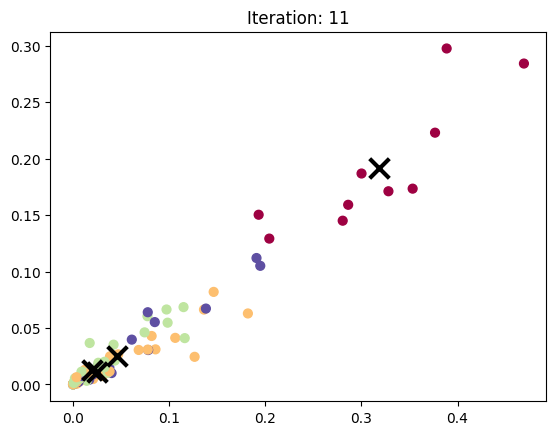

Inertia value after 12 iterations
1.7440395616894278
Iteration: 12
Centroids:
[[0.31798436 0.1920575  0.27910053 0.22644483]
 [0.02523482 0.01171236 0.30960624 0.15445356]
 [0.01825609 0.01160288 0.34588016 0.31256715]
 [0.04781948 0.02639868 0.54287919 0.22938355]]


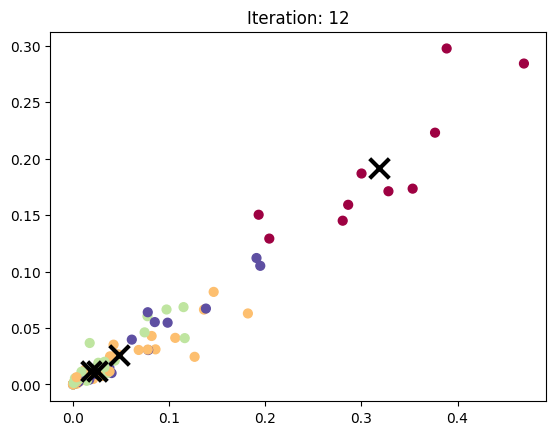

Inertia value after 1 iterations
1.8427502701797056
Iteration: 1
Centroids:
[[0.428855   0.29100334 0.24074074 0.16987741]
 [0.03542959 0.01879693 0.46610245 0.23698418]
 [0.0237525  0.01227747 0.30341305 0.18003023]
 [0.01301725 0.00991222 0.33474265 0.42206655]
 [0.2902667  0.16732104 0.28869048 0.24058669]]


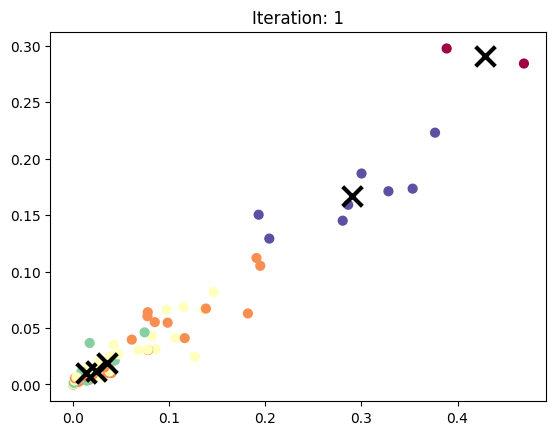

Inertia value after 2 iterations
1.7612467640707303
Iteration: 2
Centroids:
[[0.41142885 0.26836269 0.23544974 0.17921775]
 [0.0358485  0.0198141  0.47950925 0.22122557]
 [0.02387213 0.01235478 0.30414205 0.1790493 ]
 [0.01232022 0.00857318 0.35665522 0.39343257]
 [0.26593259 0.14730101 0.30753968 0.24014886]]


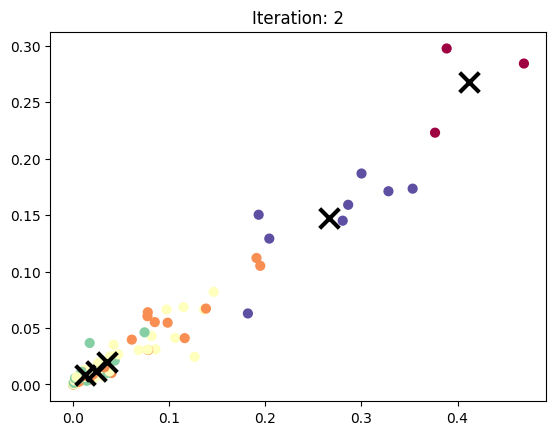

Inertia value after 3 iterations
1.7272635986382874
Iteration: 3
Centroids:
[[0.41142885 0.26836269 0.23544974 0.17921775]
 [0.03951431 0.02165508 0.48956916 0.2155853 ]
 [0.02209006 0.01134633 0.30521629 0.17483198]
 [0.01115075 0.00778097 0.35627261 0.37464098]
 [0.25264064 0.14004763 0.3101117  0.23759486]]


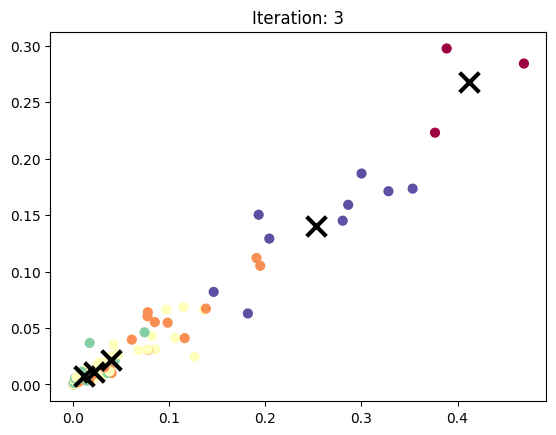

Inertia value after 4 iterations
1.6975960781319372
Iteration: 4
Centroids:
[[0.39689461 0.24464365 0.24140212 0.18432574]
 [0.04267353 0.02330649 0.49842923 0.21226315]
 [0.02080707 0.01037527 0.30843891 0.16934615]
 [0.01404085 0.00968379 0.34998026 0.36047869]
 [0.24005923 0.13586776 0.31646825 0.242338  ]]


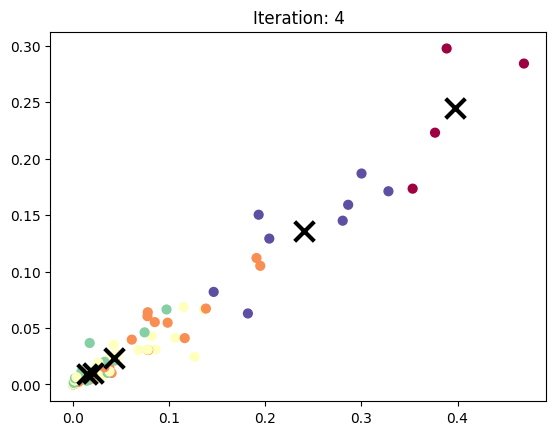

Inertia value after 5 iterations
1.6607084150000126
Iteration: 5
Centroids:
[[0.38313654 0.22995151 0.23862434 0.18914186]
 [0.04174995 0.02360732 0.5086663  0.20638156]
 [0.02112653 0.01053061 0.30850675 0.167671  ]
 [0.01697147 0.01036629 0.35300157 0.34985062]
 [0.22748137 0.13082274 0.32917611 0.24718539]]


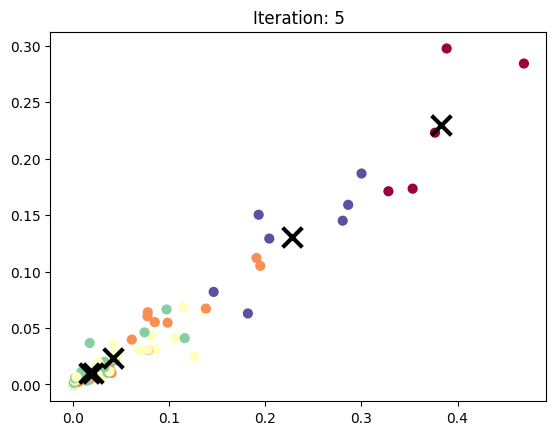

Inertia value after 6 iterations
1.6219803604986582
Iteration: 6
Centroids:
[[0.36930009 0.22277651 0.23765432 0.20052539]
 [0.03476055 0.01922194 0.51293357 0.19883714]
 [0.01957612 0.00933098 0.30668224 0.16151002]
 [0.01878779 0.01200296 0.35395703 0.34063047]
 [0.20024868 0.11281496 0.35813492 0.25853765]]


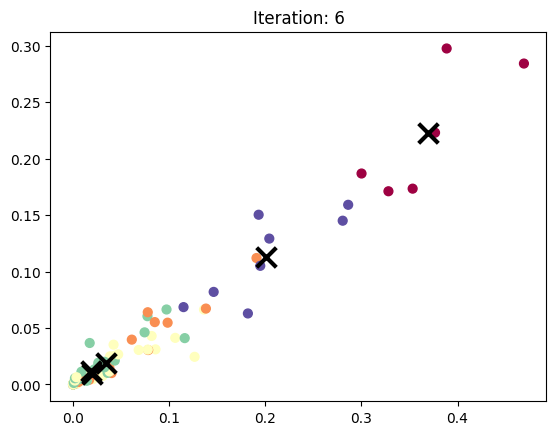

Inertia value after 7 iterations
1.5883829585877867
Iteration: 7
Centroids:
[[0.35743389 0.21369283 0.24640967 0.19964974]
 [0.03732196 0.02061145 0.51968254 0.19351819]
 [0.02072078 0.00983462 0.30221321 0.15542817]
 [0.01441217 0.00997398 0.35776819 0.32958973]
 [0.17899306 0.09804913 0.36970899 0.26882662]]


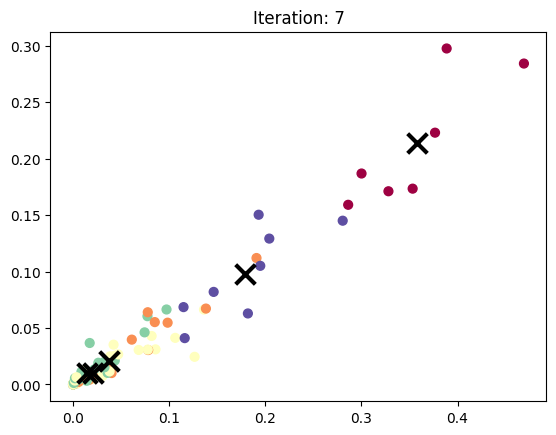

Inertia value after 8 iterations
1.5639415533920298
Iteration: 8
Centroids:
[[0.35743389 0.21369283 0.24640967 0.19964974]
 [0.0315974  0.01783816 0.53006253 0.18631366]
 [0.01943627 0.00935141 0.30004966 0.1528021 ]
 [0.0138417  0.00962733 0.35909254 0.32573998]
 [0.1613576  0.08615348 0.38455988 0.2591944 ]]


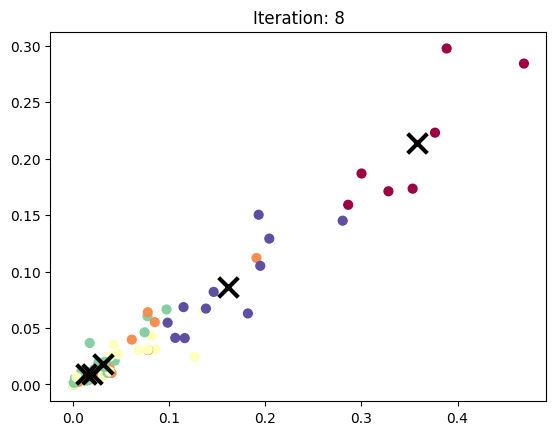

Inertia value after 9 iterations
1.5574383140410062
Iteration: 9
Centroids:
[[0.35743389 0.21369283 0.24640967 0.19964974]
 [0.0240135  0.01335259 0.53010834 0.18684615]
 [0.0171462  0.0082338  0.29903393 0.15311974]
 [0.01239636 0.00847123 0.35811473 0.32685436]
 [0.15567565 0.08475487 0.39380197 0.24568426]]


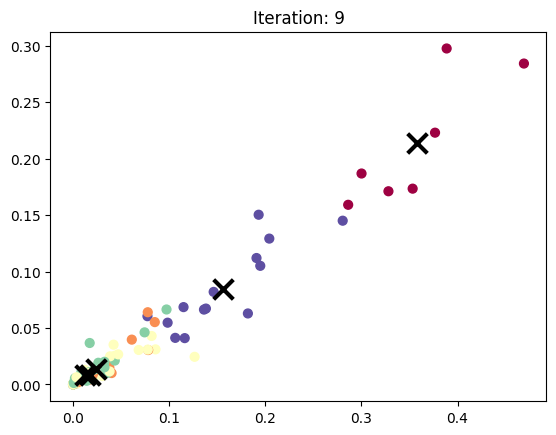

Inertia value after 1 iterations
1.858032732310528
Iteration: 1
Centroids:
[[0.01213683 0.00833027 0.24183007 0.28257958]
 [0.0093084  0.00563146 0.34026764 0.16764493]
 [0.36930009 0.22277651 0.23765432 0.20052539]
 [0.13619077 0.07046053 0.30801209 0.21078309]
 [0.12275173 0.06845707 0.46604938 0.25394046]
 [0.00884532 0.00483466 0.46126151 0.29472336]]


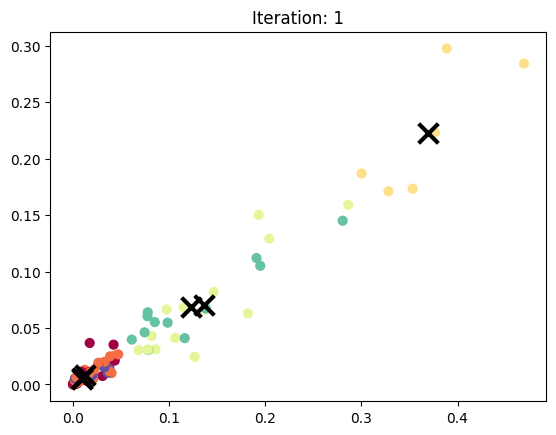

Inertia value after 2 iterations
1.5701702793053227
Iteration: 2
Centroids:
[[0.01671014 0.01202935 0.28190476 0.30640981]
 [0.01030072 0.00572609 0.32550909 0.15689327]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.13067135 0.06633709 0.31024531 0.20792867]
 [0.09875184 0.05393525 0.51481481 0.20396964]
 [0.00863878 0.00457606 0.45963493 0.30519591]]


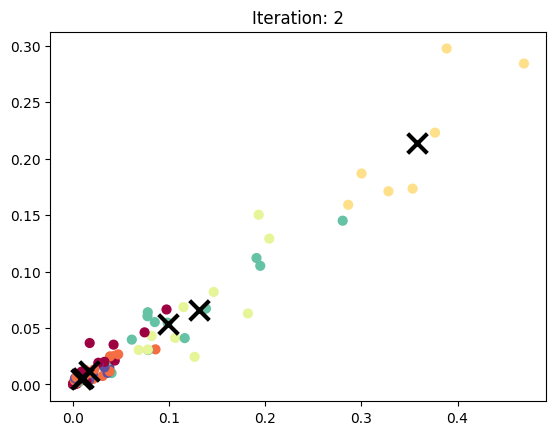

Inertia value after 3 iterations
1.4760329066096844
Iteration: 3
Centroids:
[[0.01934212 0.01319015 0.3015873  0.31922942]
 [0.00797665 0.00463283 0.31516939 0.15162483]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.12610493 0.06168334 0.31908832 0.2100229 ]
 [0.08020453 0.04338672 0.55026455 0.18377846]
 [0.01148526 0.00777555 0.43856724 0.32005067]]


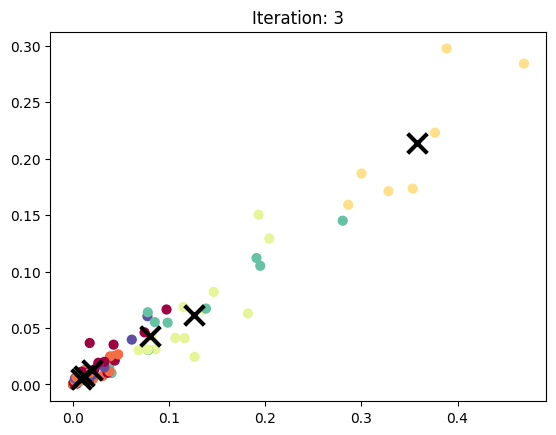

Inertia value after 4 iterations
1.4318063855127572
Iteration: 4
Centroids:
[[0.0186711  0.01281727 0.30352055 0.31621125]
 [0.00944981 0.00523615 0.31088934 0.14665325]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.14242827 0.07049273 0.33557184 0.22403341]
 [0.06095164 0.03345229 0.56155203 0.1711617 ]
 [0.01424132 0.00917343 0.43047659 0.31476211]]


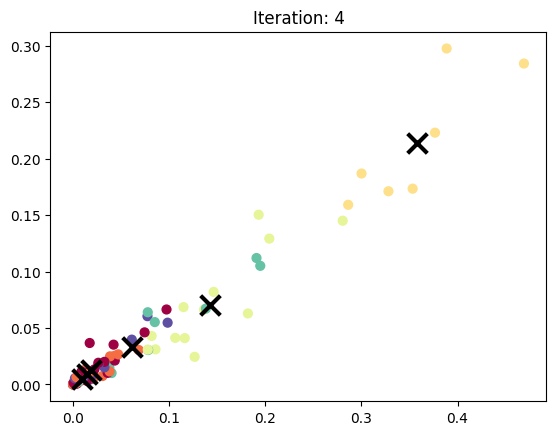

Inertia value after 5 iterations
1.404517678649486
Iteration: 5
Centroids:
[[0.0186711  0.01281727 0.30352055 0.31621125]
 [0.01137115 0.00595656 0.30787888 0.14398033]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.14706865 0.07465442 0.35355253 0.23855392]
 [0.05139266 0.02833287 0.5659486  0.15911934]
 [0.01052715 0.0070552  0.42822151 0.31027773]]


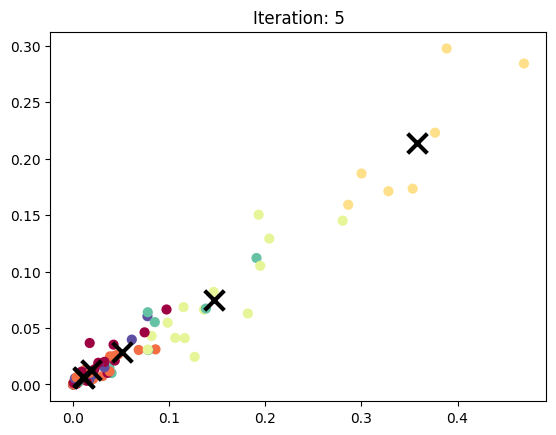

Inertia value after 6 iterations
1.3797020623809688
Iteration: 6
Centroids:
[[0.01798992 0.0123514  0.30604181 0.32493171]
 [0.01310965 0.00686747 0.30489565 0.1439058 ]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.14619084 0.07532978 0.37178131 0.24331582]
 [0.04471171 0.02533921 0.57285307 0.15290314]
 [0.00813009 0.00514339 0.42986598 0.29928002]]


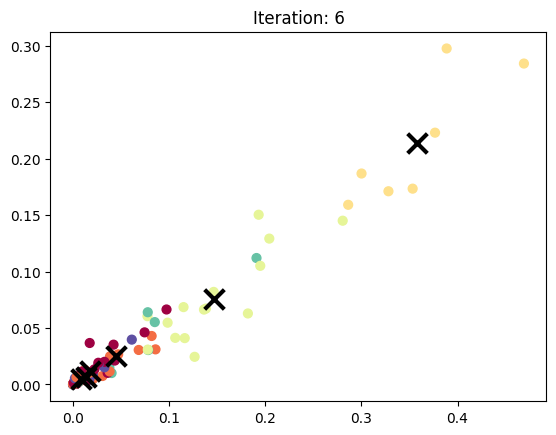

Inertia value after 7 iterations
1.3560691302124794
Iteration: 7
Centroids:
[[0.01716506 0.01183987 0.30785081 0.33868277]
 [0.01564221 0.00732242 0.30241901 0.14308604]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.14759799 0.07896009 0.37830688 0.24918689]
 [0.04760992 0.02683093 0.57694004 0.14535902]
 [0.00891025 0.00561292 0.43026797 0.28172148]]


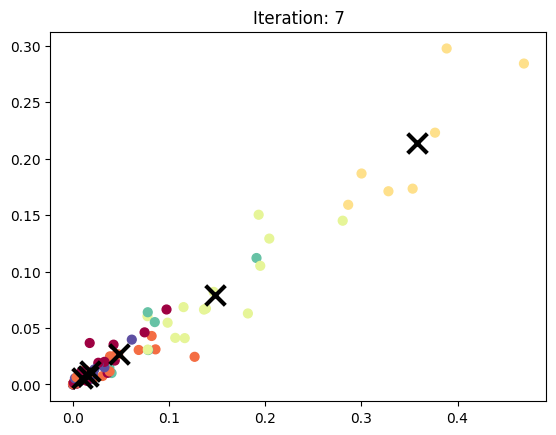

Inertia value after 8 iterations
1.3484568528293215
Iteration: 8
Centroids:
[[0.01705226 0.01177975 0.3131345  0.34461958]
 [0.01667554 0.0076707  0.30152122 0.14675292]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.15296922 0.0826564  0.38339438 0.25111141]
 [0.04760992 0.02683093 0.57694004 0.14535902]
 [0.00917956 0.00583478 0.43161042 0.2775748 ]]


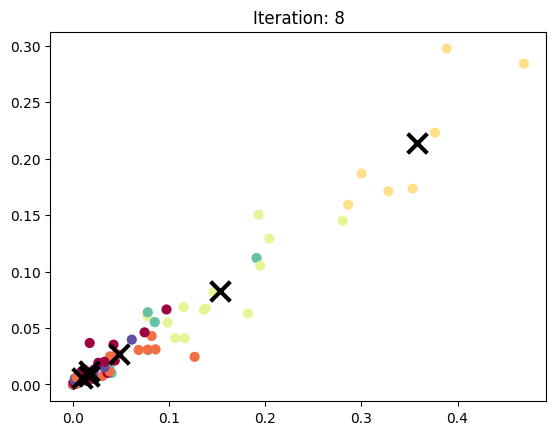

Inertia value after 9 iterations
1.3402758449871586
Iteration: 9
Centroids:
[[0.01665063 0.01164404 0.31533543 0.34734384]
 [0.01659868 0.00770061 0.30173419 0.14865149]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.15567565 0.08475487 0.39380197 0.24568426]
 [0.03458725 0.01908511 0.58128908 0.14265244]
 [0.00943639 0.00584666 0.43375385 0.27622974]]


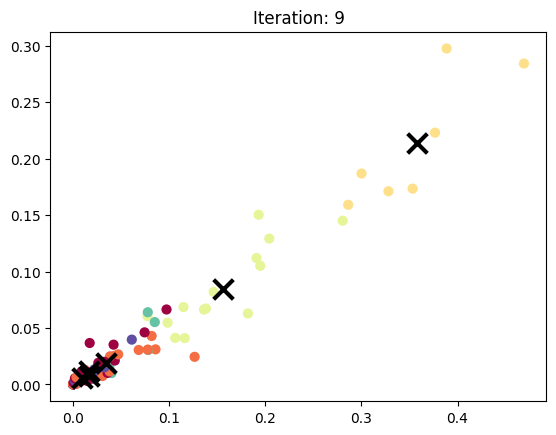

Inertia value after 10 iterations
1.3364896284347785
Iteration: 10
Centroids:
[[0.01566898 0.0107353  0.31840796 0.351071  ]
 [0.01710015 0.00824121 0.30043449 0.1506473 ]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.15096718 0.08278889 0.3989418  0.24144775]
 [0.02954112 0.01546711 0.59232804 0.13870403]
 [0.00943639 0.00584666 0.43375385 0.27622974]]


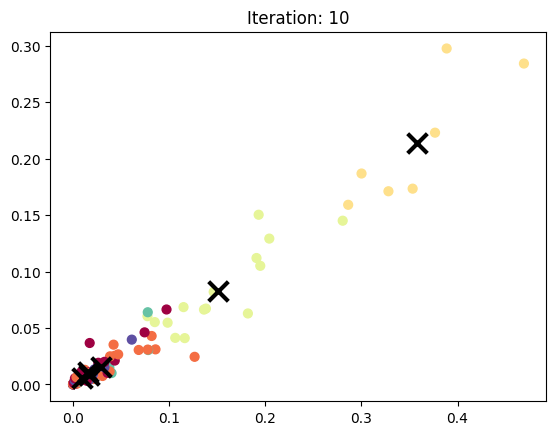

Inertia value after 1 iterations
2.144678061675946
Iteration: 1
Centroids:
[[0.00903874 0.00512748 0.44838802 0.46344133]
 [0.05629717 0.03290114 0.38104571 0.3364114 ]
 [0.02681054 0.01375699 0.35198018 0.08625219]
 [0.07380028 0.0508088  0.23662551 0.3237984 ]
 [0.08752535 0.05010982 0.25541126 0.1528419 ]
 [0.02670507 0.01524697 0.35334947 0.26450393]
 [0.0349833  0.01761684 0.45829286 0.18723609]]


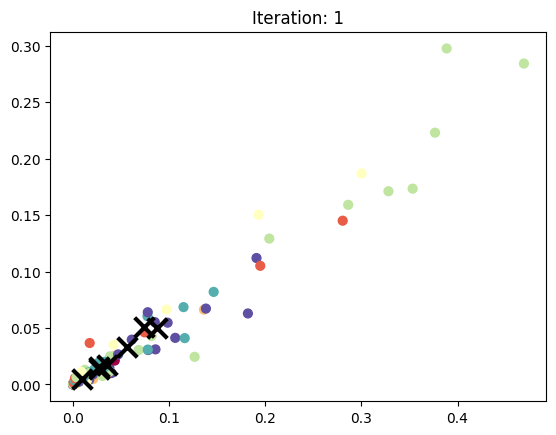

Inertia value after 2 iterations
1.8038575621331703
Iteration: 2
Centroids:
[[0.0041277  0.00283444 0.46973748 0.47135352]
 [0.07118832 0.03989626 0.37840888 0.33552248]
 [0.01130157 0.00656286 0.32319948 0.10954466]
 [0.08611303 0.05833498 0.24162257 0.32535513]
 [0.12879876 0.07068286 0.25722426 0.16718308]
 [0.01167662 0.00658405 0.35207809 0.25189989]
 [0.03617964 0.01997106 0.50752951 0.18614254]]


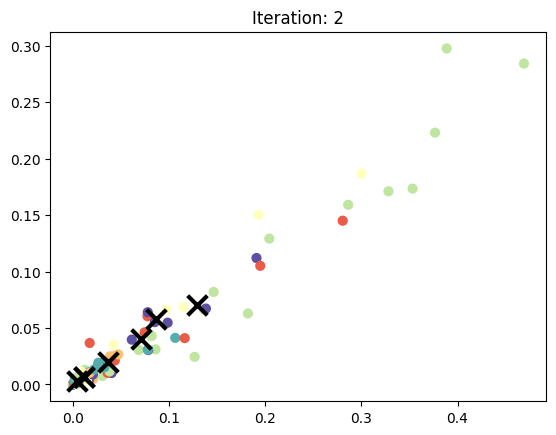

Inertia value after 3 iterations
1.3576778654797803
Iteration: 3
Centroids:
[[0.00481564 0.00330684 0.48609466 0.48131932]
 [0.07305634 0.04086292 0.38247104 0.33611747]
 [0.01295958 0.00671168 0.28799006 0.12429019]
 [0.05936242 0.04226416 0.24272487 0.33384413]
 [0.24623221 0.13817341 0.27721088 0.1923943 ]
 [0.01083674 0.00612839 0.35615091 0.25021951]
 [0.0378603  0.02086958 0.52549303 0.18042288]]


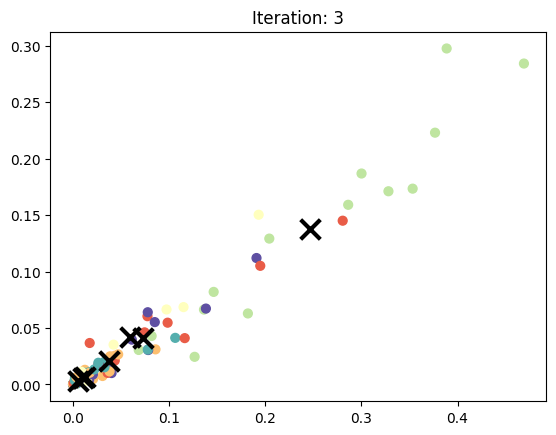

Inertia value after 4 iterations
1.2755416615794555
Iteration: 4
Centroids:
[[0.0056904  0.00389519 0.51770513 0.48791594]
 [0.07411785 0.03947134 0.3905341  0.33975482]
 [0.02230015 0.01029376 0.28776024 0.13111808]
 [0.03806236 0.02729527 0.25220459 0.34520335]
 [0.29341135 0.1745835  0.27489177 0.21031683]
 [0.01068758 0.00601424 0.35950619 0.25026222]
 [0.0396251  0.02183454 0.53023432 0.17959071]]


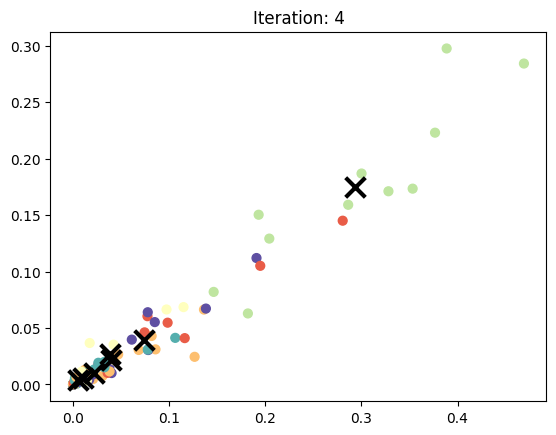

Inertia value after 5 iterations
1.1881096576556551
Iteration: 5
Centroids:
[[0.0056904  0.00389519 0.51770513 0.48791594]
 [0.09826815 0.05050932 0.40017556 0.30378553]
 [0.02230015 0.01029376 0.28776024 0.13111808]
 [0.03125775 0.02248758 0.26551227 0.35503901]
 [0.32214624 0.1972752  0.25749559 0.21132516]
 [0.01068758 0.00601424 0.35950619 0.25026222]
 [0.03854951 0.0209398  0.53373016 0.17561053]]


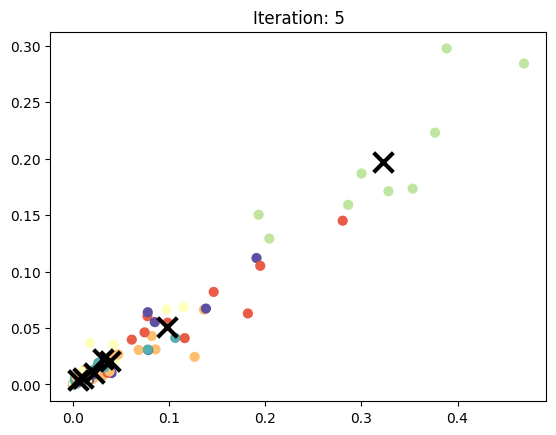

Inertia value after 6 iterations
1.1244302049334811
Iteration: 6
Centroids:
[[0.0056904  0.00389519 0.51770513 0.48791594]
 [0.13783891 0.0698442  0.40909091 0.26206018]
 [0.02230015 0.01029376 0.28776024 0.13111808]
 [0.02382282 0.01768682 0.28214544 0.36791055]
 [0.32214624 0.1972752  0.25749559 0.21132516]
 [0.0086566  0.00511556 0.36357985 0.25419953]
 [0.0351302  0.01951003 0.54085832 0.16841798]]


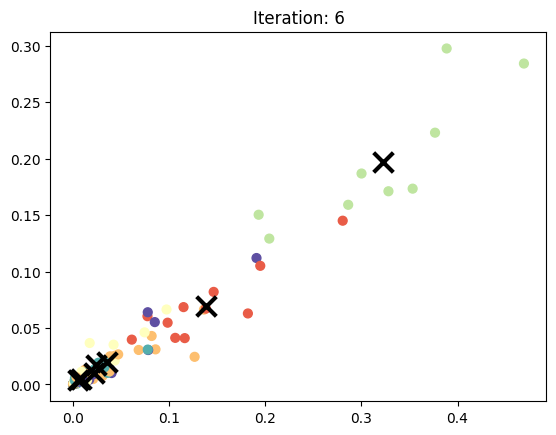

Inertia value after 7 iterations
1.1034491093203833
Iteration: 7
Centroids:
[[0.0056904  0.00389519 0.51770513 0.48791594]
 [0.14545824 0.07836096 0.4047619  0.24993745]
 [0.01922097 0.00877874 0.28602803 0.13096985]
 [0.02382282 0.01768682 0.28214544 0.36791055]
 [0.33827725 0.20313674 0.25396825 0.19964974]
 [0.00884132 0.00509336 0.36601893 0.25435285]
 [0.02654375 0.01468792 0.54596561 0.16221541]]


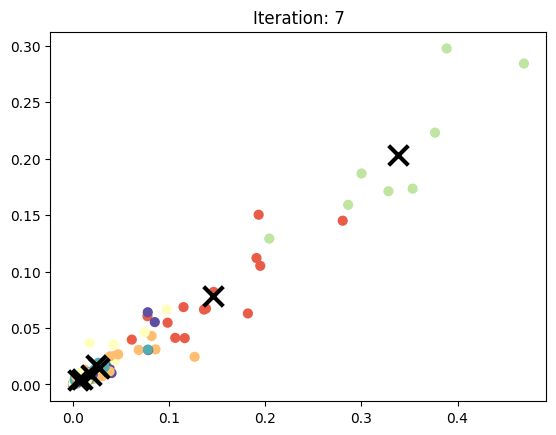

Inertia value after 8 iterations
1.0929519718015457
Iteration: 8
Centroids:
[[0.0056904  0.00389519 0.51770513 0.48791594]
 [0.14937307 0.08175317 0.39823633 0.24658494]
 [0.01882425 0.00856883 0.28504512 0.13388331]
 [0.02382282 0.01768682 0.28214544 0.36791055]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.00921685 0.00527576 0.37143019 0.25518871]
 [0.02693541 0.01507861 0.54991182 0.15446585]]


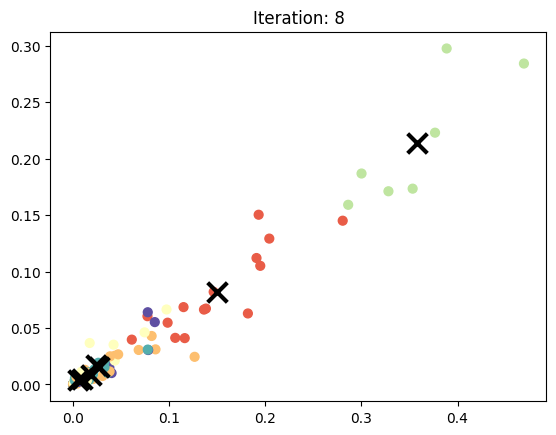

Inertia value after 9 iterations
1.0905409531896317
Iteration: 9
Centroids:
[[0.0056904  0.00389519 0.51770513 0.48791594]
 [0.15567565 0.08475487 0.39380197 0.24568426]
 [0.01842778 0.00841267 0.28560494 0.13570434]
 [0.02382282 0.01768682 0.28214544 0.36791055]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.01052992 0.00612237 0.37491744 0.25642259]
 [0.02693541 0.01507861 0.54991182 0.15446585]]


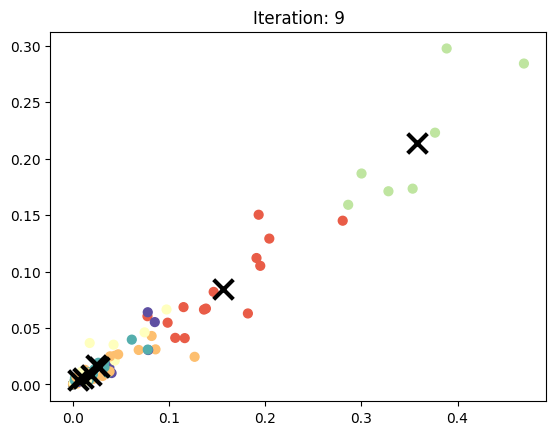

Inertia value after 10 iterations
1.0874981958221022
Iteration: 10
Centroids:
[[0.0056904  0.00389519 0.51770513 0.48791594]
 [0.15567565 0.08475487 0.39380197 0.24568426]
 [0.01822253 0.00840881 0.2870627  0.13695271]
 [0.02382282 0.01768682 0.28214544 0.36791055]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.01048987 0.00605185 0.37780344 0.25721864]
 [0.0282554  0.01578742 0.55555556 0.1497373 ]]


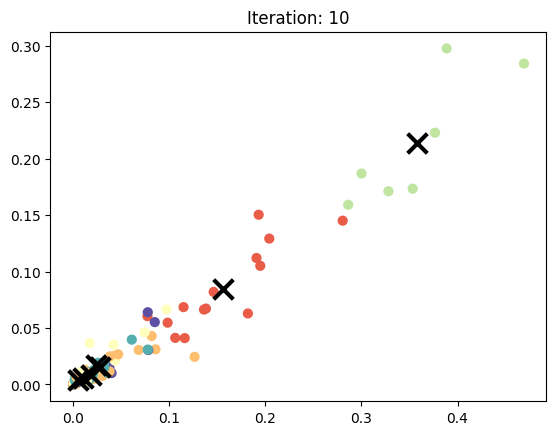

Inertia value after 11 iterations
1.0803677712488773
Iteration: 11
Centroids:
[[0.0056904  0.00389519 0.51770513 0.48791594]
 [0.15567565 0.08475487 0.39380197 0.24568426]
 [0.01822253 0.00840881 0.2870627  0.13695271]
 [0.02331767 0.01719919 0.28410104 0.36277208]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.01014075 0.00583476 0.38050907 0.25375582]
 [0.030322   0.0169012  0.56532357 0.15020881]]


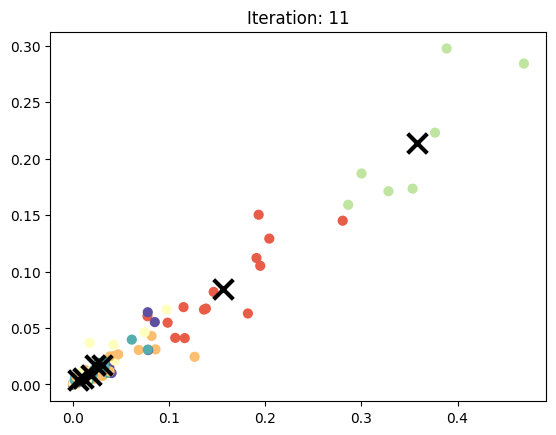

Inertia value after 12 iterations
1.0764322815676095
Iteration: 12
Centroids:
[[0.0056904  0.00389519 0.51770513 0.48791594]
 [0.15567565 0.08475487 0.39380197 0.24568426]
 [0.01779725 0.00821364 0.28715886 0.13916535]
 [0.02198207 0.01615258 0.28667772 0.35901926]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.01037014 0.00598055 0.38511301 0.25049326]
 [0.03253275 0.01811456 0.57649912 0.15105079]]


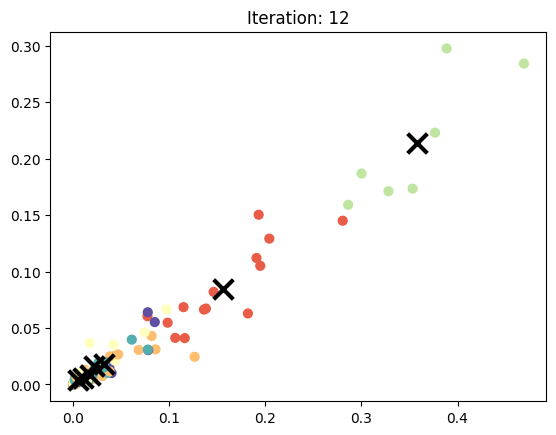

Inertia value after 13 iterations
1.073898481091367
Iteration: 13
Centroids:
[[0.0056904  0.00389519 0.51770513 0.48791594]
 [0.15096718 0.08278889 0.3989418  0.24144775]
 [0.01779725 0.00821364 0.28715886 0.13916535]
 [0.02198207 0.01615258 0.28667772 0.35901926]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.01037014 0.00598055 0.38511301 0.25049326]
 [0.02775859 0.01473724 0.58609909 0.1482248 ]]


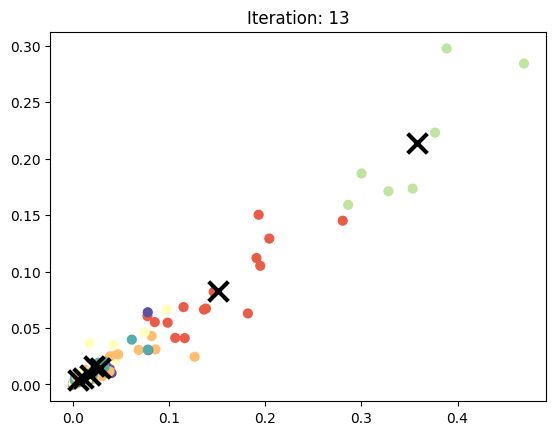

Inertia value after 1 iterations
1.195345539005581
Iteration: 1
Centroids:
[[0.08913105 0.04325993 0.30070547 0.2591944 ]
 [0.00610136 0.00322447 0.42060672 0.48486365]
 [0.01959359 0.0109407  0.4350075  0.22018916]
 [0.01168413 0.00841011 0.34643823 0.2781772 ]
 [0.01182976 0.00688828 0.26148148 0.13527145]
 [0.04420641 0.024246   0.58658009 0.1420156 ]
 [0.2914981  0.17082046 0.29320988 0.21628722]
 [0.00635323 0.00261809 0.36211008 0.05499124]]


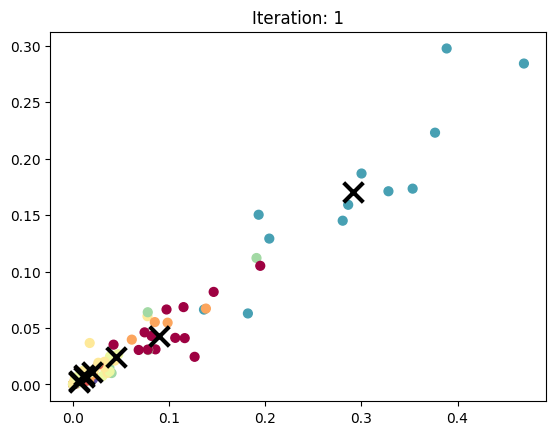

Inertia value after 2 iterations
1.1382208177011126
Iteration: 2
Centroids:
[[0.09925113 0.04585638 0.30517763 0.24193145]
 [0.00539632 0.00289131 0.44012082 0.47044658]
 [0.03067175 0.01708132 0.43059222 0.22188343]
 [0.00921488 0.00677889 0.33856511 0.28525234]
 [0.01361399 0.00756206 0.2659675  0.140668  ]
 [0.0408073  0.02361978 0.5968254  0.14115587]
 [0.31798436 0.1920575  0.27910053 0.22644483]
 [0.00635323 0.00261809 0.36211008 0.05499124]]


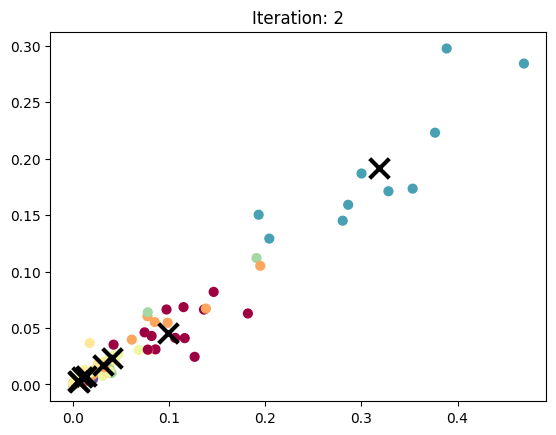

Inertia value after 3 iterations
1.1128454219899266
Iteration: 3
Centroids:
[[0.10943304 0.04944909 0.31569665 0.2165791 ]
 [0.00539632 0.00289131 0.44012082 0.47044658]
 [0.02967009 0.0165692  0.42988397 0.22395508]
 [0.0111113  0.00789984 0.3306286  0.29467853]
 [0.01349688 0.00758607 0.26865535 0.14221873]
 [0.0408073  0.02361978 0.5968254  0.14115587]
 [0.31798436 0.1920575  0.27910053 0.22644483]
 [0.00635323 0.00261809 0.36211008 0.05499124]]


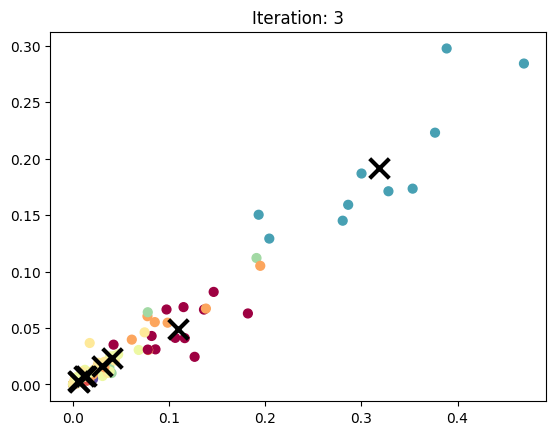

Inertia value after 4 iterations
1.0909405365742961
Iteration: 4
Centroids:
[[0.11672132 0.05558717 0.31501832 0.21527684]
 [0.0041277  0.00283444 0.46973748 0.47135352]
 [0.02824901 0.01584528 0.42804666 0.22749813]
 [0.0114174  0.00791476 0.32337471 0.3007704 ]
 [0.01349688 0.00758607 0.26865535 0.14221873]
 [0.0408073  0.02361978 0.5968254  0.14115587]
 [0.33062921 0.19903677 0.27601411 0.22942207]
 [0.00635323 0.00261809 0.36211008 0.05499124]]


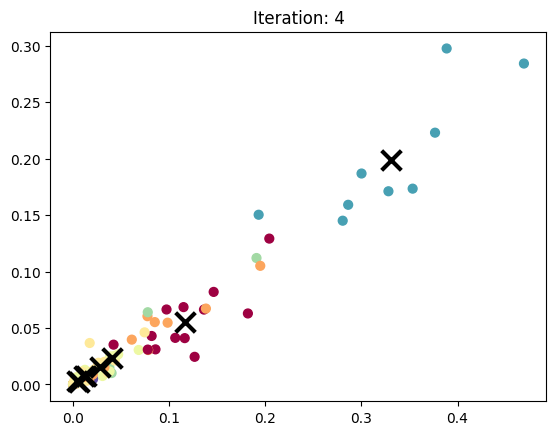

Inertia value after 5 iterations
1.0784893436899146
Iteration: 5
Centroids:
[[0.12833091 0.06444191 0.31888482 0.21945305]
 [0.0041277  0.00283444 0.46973748 0.47135352]
 [0.02698242 0.01526843 0.42478564 0.23116748]
 [0.01301711 0.00913891 0.31591148 0.30458574]
 [0.01307086 0.00734978 0.27186949 0.14273205]
 [0.0408073  0.02361978 0.5968254  0.14115587]
 [0.34782059 0.2051185  0.27480159 0.22000876]
 [0.00635323 0.00261809 0.36211008 0.05499124]]


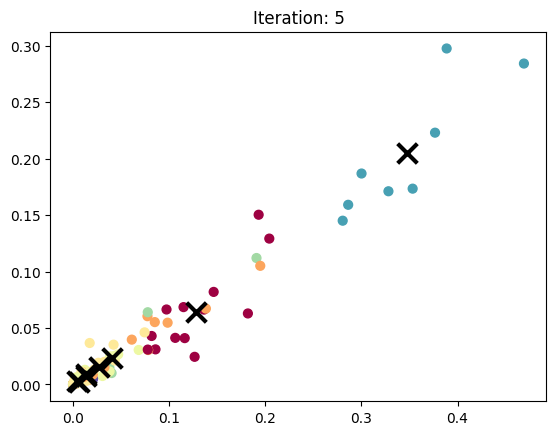

Inertia value after 6 iterations
1.0649629873013047
Iteration: 6
Centroids:
[[0.13307709 0.06734779 0.33182162 0.22804603]
 [0.0041277  0.00283444 0.46973748 0.47135352]
 [0.02135941 0.01231967 0.41937256 0.22977691]
 [0.01326509 0.00934848 0.31149383 0.31095023]
 [0.0126986  0.00715831 0.27376685 0.14496356]
 [0.0408073  0.02361978 0.5968254  0.14115587]
 [0.34782059 0.2051185  0.27480159 0.22000876]
 [0.00635323 0.00261809 0.36211008 0.05499124]]


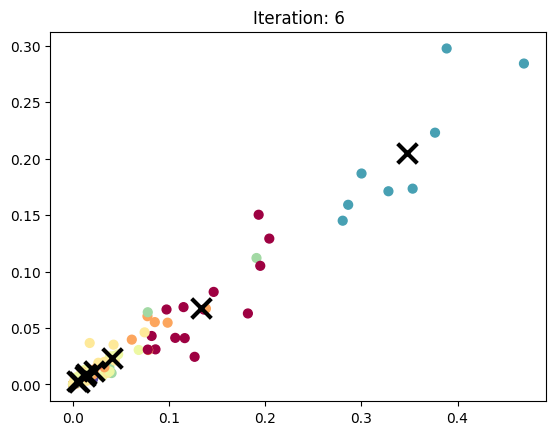

Inertia value after 7 iterations
1.0265913498034767
Iteration: 7
Centroids:
[[0.14290711 0.07253115 0.34126984 0.23701109]
 [0.004742   0.00324599 0.49335334 0.47518973]
 [0.02024456 0.01175615 0.41569489 0.23070447]
 [0.01417284 0.00989859 0.30971212 0.32439714]
 [0.01232634 0.00694732 0.27430556 0.14754816]
 [0.0408073  0.02361978 0.5968254  0.14115587]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.00635323 0.00261809 0.36211008 0.05499124]]


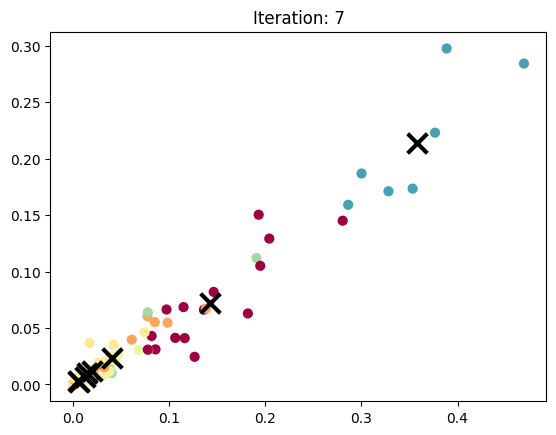

Inertia value after 8 iterations
1.002823007820445
Iteration: 8
Centroids:
[[0.15020072 0.07470136 0.36337868 0.23467601]
 [0.0056904  0.00389519 0.51770513 0.48791594]
 [0.01465937 0.00931314 0.41056509 0.23064104]
 [0.01709667 0.01196291 0.312298   0.32989557]
 [0.01453491 0.00804789 0.27008177 0.15188664]
 [0.04420641 0.024246   0.58658009 0.1420156 ]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.00635323 0.00261809 0.36211008 0.05499124]]


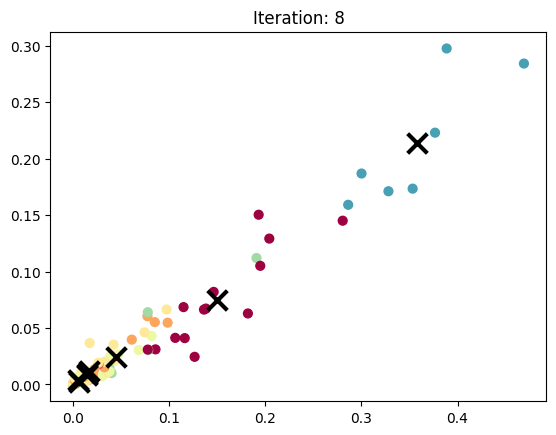

Inertia value after 9 iterations
0.9914510347483908
Iteration: 9
Centroids:
[[0.1481945  0.07686121 0.37414966 0.24130598]
 [0.0056904  0.00389519 0.51770513 0.48791594]
 [0.01184507 0.00780247 0.40592123 0.22822344]
 [0.01613217 0.01106644 0.31525371 0.33295164]
 [0.01928994 0.00956621 0.26527177 0.1523112 ]
 [0.04420641 0.024246   0.58658009 0.1420156 ]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.00635323 0.00261809 0.36211008 0.05499124]]


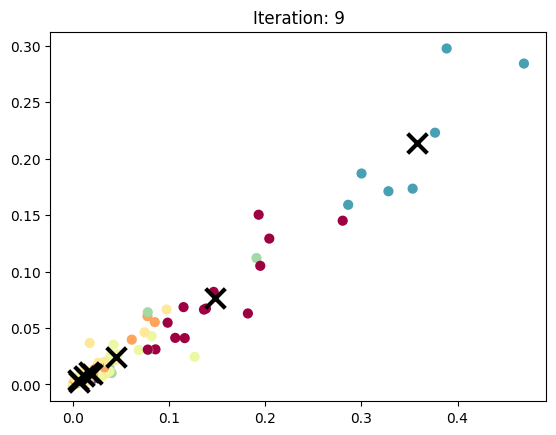

Inertia value after 10 iterations
0.9806682707088895
Iteration: 10
Centroids:
[[0.15048208 0.08116508 0.38835979 0.24424985]
 [0.0056904  0.00389519 0.51770513 0.48791594]
 [0.00997104 0.00629695 0.40602994 0.22683818]
 [0.01613217 0.01106644 0.31525371 0.33295164]
 [0.02124574 0.01019988 0.26758481 0.15272484]
 [0.02954112 0.01546711 0.59232804 0.13870403]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.00635323 0.00261809 0.36211008 0.05499124]]


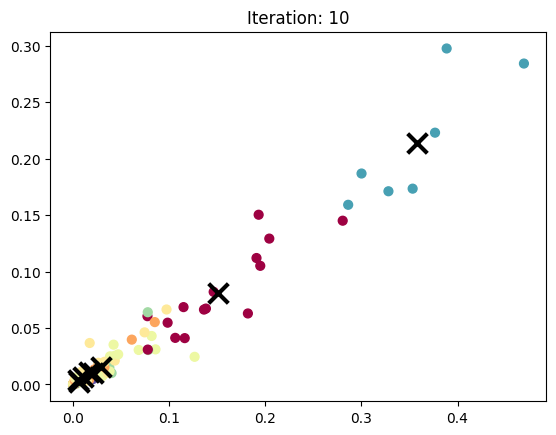

Inertia value after 11 iterations
0.9793606159562248
Iteration: 11
Centroids:
[[0.15567565 0.08475487 0.39380197 0.24568426]
 [0.0056904  0.00389519 0.51770513 0.48791594]
 [0.00997104 0.00629695 0.40602994 0.22683818]
 [0.01613217 0.01106644 0.31525371 0.33295164]
 [0.02286078 0.01079155 0.26885865 0.15476607]
 [0.02954112 0.01546711 0.59232804 0.13870403]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.00635323 0.00261809 0.36211008 0.05499124]]


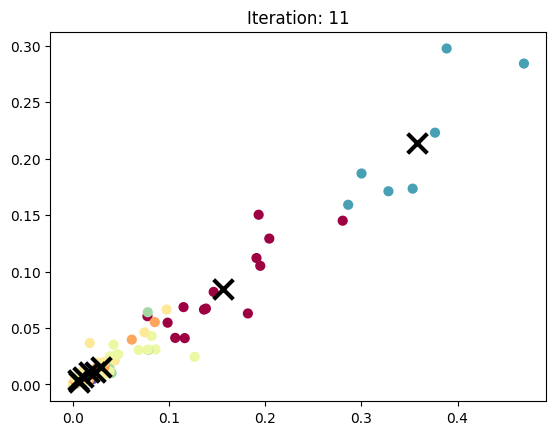

Inertia value after 1 iterations
1.1570470713567411
Iteration: 1
Centroids:
[[0.12238311 0.06409518 0.47373394 0.25581686]
 [0.0362528  0.02522164 0.32648267 0.42148278]
 [0.01076437 0.00824047 0.32008702 0.29488783]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.00910127 0.00606182 0.37719771 0.25487803]
 [0.00791847 0.00434167 0.2825067  0.08478418]
 [0.00900533 0.00564488 0.34925301 0.17767871]
 [0.07776037 0.03757732 0.2728647  0.18501376]
 [0.01093155 0.0050437  0.52241715 0.20937158]]


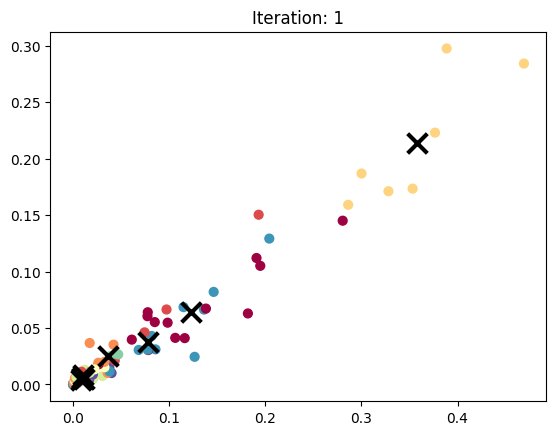

Inertia value after 2 iterations
1.0498603599785905
Iteration: 2
Centroids:
[[0.13191598 0.0692295  0.46729197 0.27829963]
 [0.01509989 0.0082836  0.34418735 0.45436855]
 [0.01379971 0.01025753 0.31662737 0.30014177]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.00621311 0.00422804 0.39165943 0.25597284]
 [0.00738618 0.0041606  0.27148237 0.08482925]
 [0.00963738 0.00590172 0.35075165 0.17011622]
 [0.08427746 0.04438104 0.2788671  0.19954672]
 [0.02200724 0.01132221 0.55720899 0.18755169]]


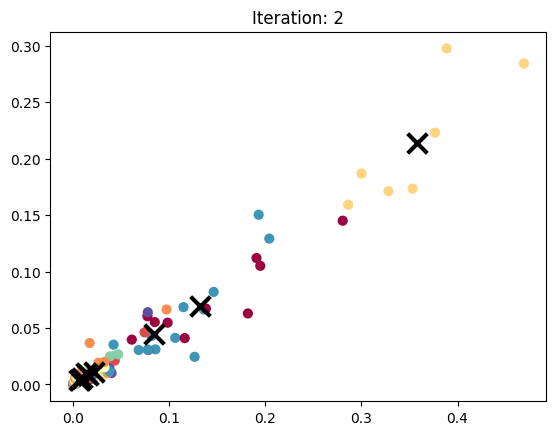

Inertia value after 3 iterations
0.9726975684347257
Iteration: 3
Centroids:
[[0.14245299 0.07437266 0.4510582  0.25604203]
 [0.00977752 0.00513085 0.37740311 0.46915742]
 [0.01271331 0.00929254 0.32015471 0.30322742]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.00718847 0.00429961 0.40642746 0.25492446]
 [0.00649062 0.00372829 0.26078048 0.0986266 ]
 [0.00963738 0.00590172 0.35075165 0.17011622]
 [0.10165571 0.05444316 0.29241623 0.21190893]
 [0.0254838  0.01355573 0.58531746 0.16666667]]


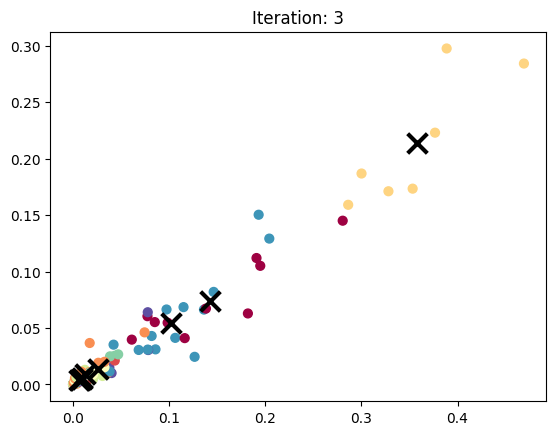

Inertia value after 4 iterations
0.9508754659690559
Iteration: 4
Centroids:
[[0.15148809 0.07822191 0.45002939 0.25569177]
 [0.0107657  0.00546876 0.4053986  0.4752627 ]
 [0.01169444 0.00859416 0.31514271 0.30830732]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.00996194 0.00610118 0.41046032 0.25293433]
 [0.00797398 0.00418467 0.26038364 0.10666333]
 [0.00963738 0.00590172 0.35075165 0.17011622]
 [0.1139003  0.06150822 0.2979243  0.21635457]
 [0.0254838  0.01355573 0.58531746 0.16666667]]


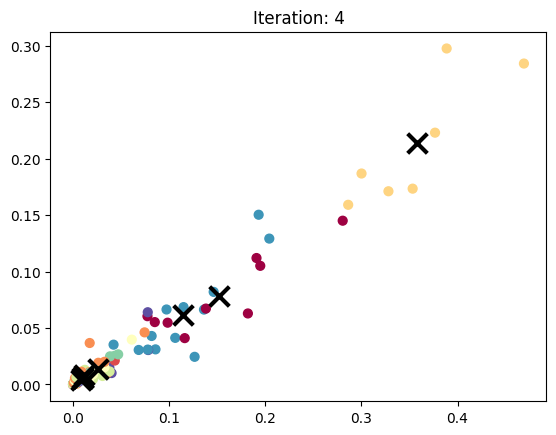

Inertia value after 5 iterations
0.9191011080444762
Iteration: 5
Centroids:
[[0.16074457 0.0804377  0.45601852 0.2530648 ]
 [0.00539632 0.00289131 0.44012082 0.47044658]
 [0.01354791 0.00949729 0.31548778 0.31615016]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.01289561 0.00846615 0.41009755 0.25396795]
 [0.00797398 0.00418467 0.26038364 0.10666333]
 [0.00925255 0.00566281 0.34815399 0.17261859]
 [0.1139003  0.06150822 0.2979243  0.21635457]
 [0.02775859 0.01473724 0.58609909 0.1482248 ]]


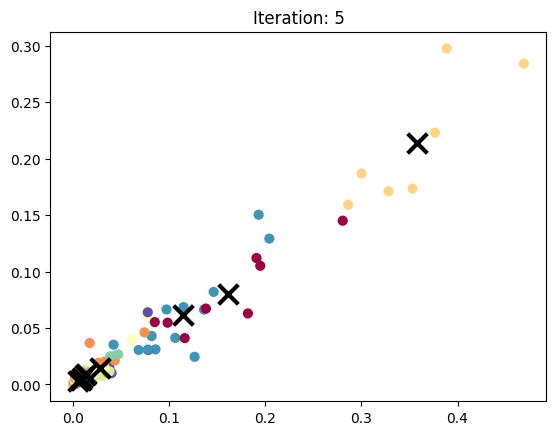

Inertia value after 6 iterations
0.9037673102376897
Iteration: 6
Centroids:
[[0.16074457 0.0804377  0.45601852 0.2530648 ]
 [0.0041277  0.00283444 0.46973748 0.47135352]
 [0.01357827 0.00923862 0.31204263 0.32231465]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.01277218 0.00842334 0.41483554 0.25352898]
 [0.00797398 0.00418467 0.26038364 0.10666333]
 [0.00925255 0.00566281 0.34815399 0.17261859]
 [0.1139003  0.06150822 0.2979243  0.21635457]
 [0.02954112 0.01546711 0.59232804 0.13870403]]


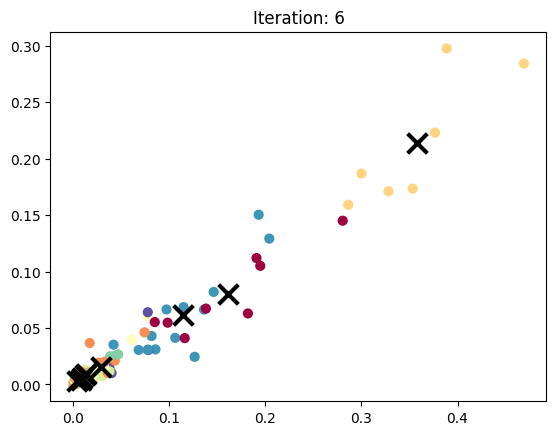

Inertia value after 7 iterations
0.8868498973314956
Iteration: 7
Centroids:
[[0.16074457 0.0804377  0.45601852 0.2530648 ]
 [0.0056904  0.00389519 0.51770513 0.48791594]
 [0.01253951 0.00851703 0.31505962 0.33415061]
 [0.35743389 0.21369283 0.24640967 0.19964974]
 [0.01277218 0.00842334 0.41483554 0.25352898]
 [0.00797398 0.00418467 0.26038364 0.10666333]
 [0.00940172 0.00580879 0.34665462 0.17549621]
 [0.1139003  0.06150822 0.2979243  0.21635457]
 [0.02954112 0.01546711 0.59232804 0.13870403]]


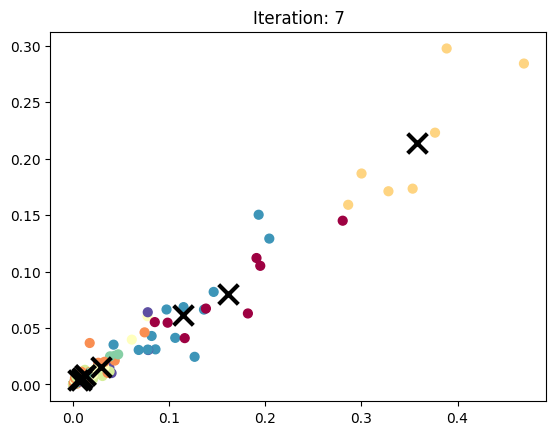

Inertia value after 1 iterations
1.2586722977568774
Iteration: 1
Centroids:
[[0.01587633 0.00924576 0.37687148 0.23363438]
 [0.01384528 0.00942467 0.32290137 0.39299475]
 [0.0135404  0.00913267 0.62301587 0.52714536]
 [0.02985923 0.01677274 0.28865745 0.13089946]
 [0.17162896 0.09790238 0.29021164 0.23091068]
 [0.00235528 0.00098239 0.27142857 0.25183888]
 [0.00262024 0.00173156 0.43726379 0.20602257]
 [0.00571729 0.00441027 0.34086371 0.29997498]
 [0.06634392 0.03512357 0.46866097 0.28937087]
 [0.04760992 0.02683093 0.57694004 0.14535902]]


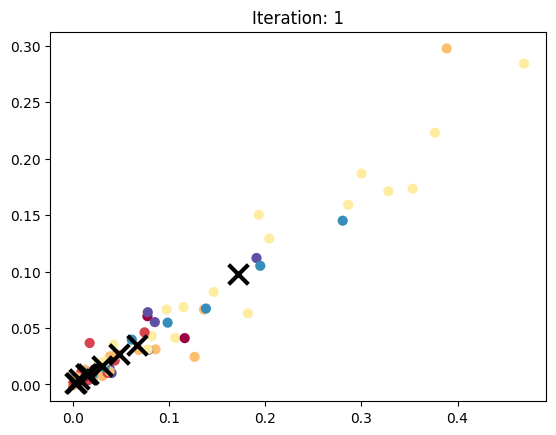

Inertia value after 2 iterations
1.0065031555310386
Iteration: 2
Centroids:
[[0.01402326 0.00704504 0.37091973 0.22690085]
 [0.01375867 0.00833119 0.31094886 0.4182455 ]
 [0.0135404  0.00913267 0.62301587 0.52714536]
 [0.02115274 0.00949095 0.27921528 0.12450744]
 [0.25542692 0.15155309 0.28042328 0.21491118]
 [0.0088652  0.0066767  0.27248677 0.23759486]
 [0.01106798 0.00730274 0.44107744 0.20068018]
 [0.01195574 0.00922366 0.34327447 0.30324667]
 [0.09169277 0.0482771  0.46368446 0.29406146]
 [0.04420641 0.024246   0.58658009 0.1420156 ]]


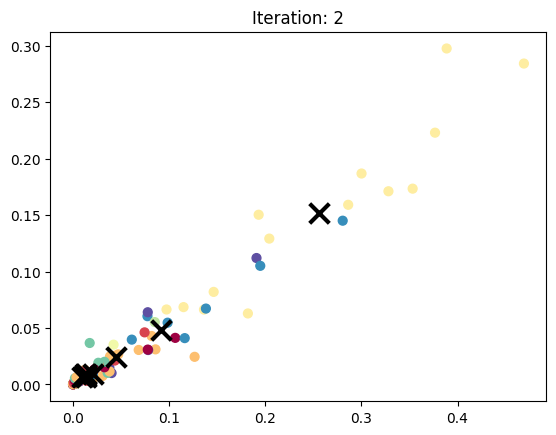

Inertia value after 3 iterations
0.8740770493565229
Iteration: 3
Centroids:
[[0.01379887 0.0068182  0.37277074 0.22218979]
 [0.01601542 0.00948576 0.30656243 0.43296361]
 [0.00918064 0.00627484 0.60758377 0.47460595]
 [0.02288036 0.01039944 0.28253855 0.11446085]
 [0.29341135 0.1745835  0.27489177 0.21031683]
 [0.02852884 0.01710861 0.27166005 0.22942207]
 [0.01800892 0.00946498 0.45194004 0.203951  ]
 [0.01041369 0.00813723 0.34719754 0.3102014 ]
 [0.13091628 0.07048532 0.46119929 0.27359408]
 [0.02413486 0.01379587 0.60435038 0.13738081]]


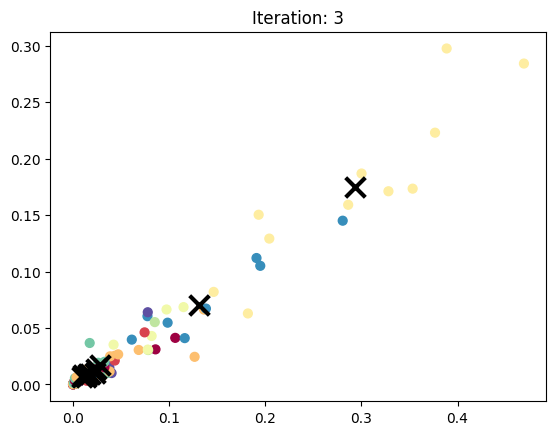

Inertia value after 4 iterations
0.8194298354453282
Iteration: 4
Centroids:
[[0.01562362 0.00769616 0.37089684 0.21153597]
 [0.00871143 0.0048999  0.30354675 0.44111208]
 [0.00918064 0.00627484 0.60758377 0.47460595]
 [0.02030249 0.00925373 0.28531614 0.10515178]
 [0.32214624 0.1972752  0.25749559 0.21132516]
 [0.03095895 0.01761274 0.26663882 0.22075767]
 [0.02349393 0.01240477 0.46447468 0.21572082]
 [0.01187944 0.00878296 0.35085641 0.30998249]
 [0.15829437 0.08119474 0.43445032 0.25958358]
 [0.02242576 0.01365555 0.61441799 0.13200525]]


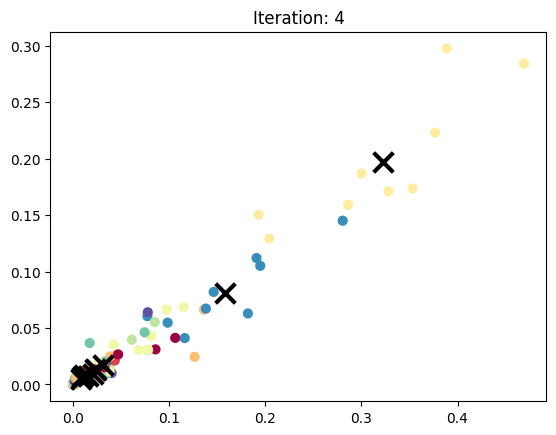

Inertia value after 5 iterations
0.8065997776518434
Iteration: 5
Centroids:
[[0.01757464 0.00909539 0.36395239 0.20292534]
 [0.00871143 0.0048999  0.30354675 0.44111208]
 [0.00918064 0.00627484 0.60758377 0.47460595]
 [0.01386015 0.00727432 0.28483969 0.09352014]
 [0.32214624 0.1972752  0.25749559 0.21132516]
 [0.03450912 0.01708496 0.26203704 0.21269702]
 [0.02207733 0.01167733 0.46137566 0.21826879]
 [0.01355878 0.00958797 0.35195903 0.30647986]
 [0.15829437 0.08119474 0.43445032 0.25958358]
 [0.02242576 0.01365555 0.61441799 0.13200525]]


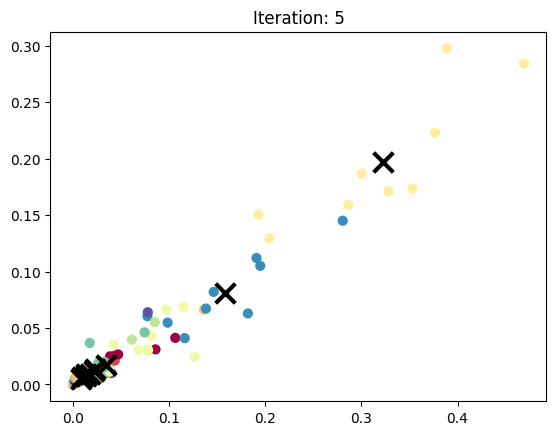

Inertia value after 6 iterations
0.8038300176308499
Iteration: 6
Centroids:
[[0.02232086 0.01138555 0.36346837 0.20027243]
 [0.00871143 0.0048999  0.30354675 0.44111208]
 [0.00918064 0.00627484 0.60758377 0.47460595]
 [0.00763019 0.00417341 0.28444857 0.08795486]
 [0.32214624 0.1972752  0.25749559 0.21132516]
 [0.03303867 0.01646261 0.26026707 0.20974064]
 [0.02207733 0.01167733 0.46137566 0.21826879]
 [0.01355878 0.00958797 0.35195903 0.30647986]
 [0.15829437 0.08119474 0.43445032 0.25958358]
 [0.02242576 0.01365555 0.61441799 0.13200525]]


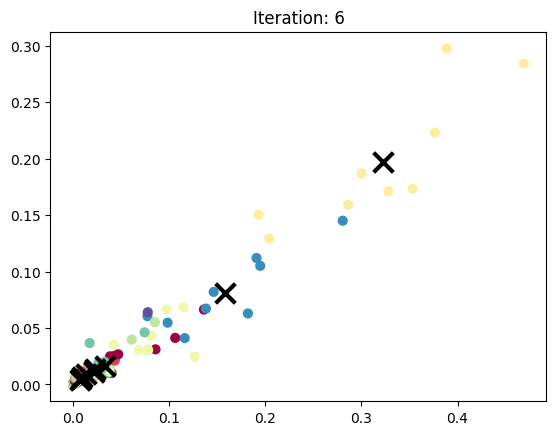

Inertia value after 7 iterations
0.803445614092892
Iteration: 7
Centroids:
[[0.02322221 0.01182424 0.36384216 0.19810923]
 [0.00871143 0.0048999  0.30354675 0.44111208]
 [0.00918064 0.00627484 0.60758377 0.47460595]
 [0.00763019 0.00417341 0.28444857 0.08795486]
 [0.32214624 0.1972752  0.25749559 0.21132516]
 [0.03303867 0.01646261 0.26026707 0.20974064]
 [0.02207733 0.01167733 0.46137566 0.21826879]
 [0.01297376 0.00919112 0.3520744  0.3040121 ]
 [0.15829437 0.08119474 0.43445032 0.25958358]
 [0.02242576 0.01365555 0.61441799 0.13200525]]


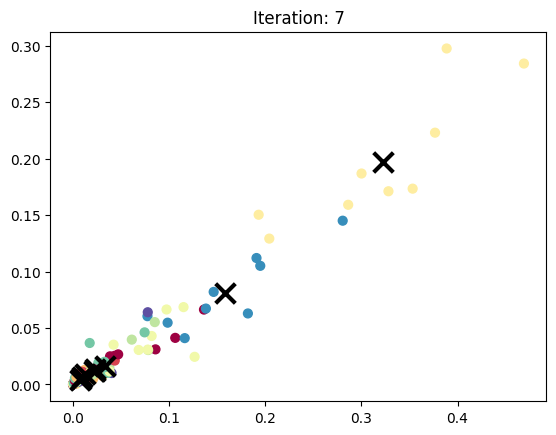

Inertia value after 8 iterations
0.8016297613861382
Iteration: 8
Centroids:
[[0.02382762 0.0118115  0.3635538  0.19319287]
 [0.00871143 0.0048999  0.30354675 0.44111208]
 [0.00918064 0.00627484 0.60758377 0.47460595]
 [0.00763019 0.00417341 0.28444857 0.08795486]
 [0.32214624 0.1972752  0.25749559 0.21132516]
 [0.03303867 0.01646261 0.26026707 0.20974064]
 [0.02207733 0.01167733 0.46137566 0.21826879]
 [0.01327284 0.00942222 0.35331938 0.29969352]
 [0.15829437 0.08119474 0.43445032 0.25958358]
 [0.02242576 0.01365555 0.61441799 0.13200525]]


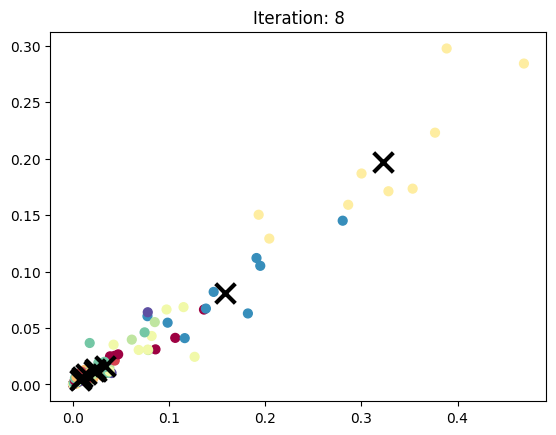

Inertia value after 9 iterations
0.8012418025845526
Iteration: 9
Centroids:
[[0.02467978 0.01214088 0.36209542 0.19038353]
 [0.00871143 0.0048999  0.30354675 0.44111208]
 [0.00918064 0.00627484 0.60758377 0.47460595]
 [0.00763019 0.00417341 0.28444857 0.08795486]
 [0.32214624 0.1972752  0.25749559 0.21132516]
 [0.03303867 0.01646261 0.26026707 0.20974064]
 [0.02207733 0.01167733 0.46137566 0.21826879]
 [0.01297921 0.00924111 0.3549538  0.29779335]
 [0.15829437 0.08119474 0.43445032 0.25958358]
 [0.02242576 0.01365555 0.61441799 0.13200525]]


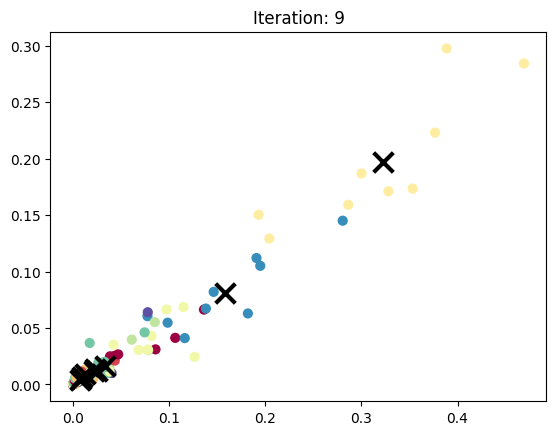

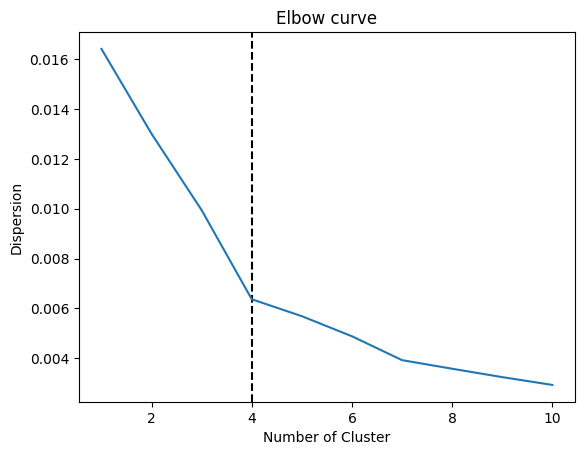

In [25]:
np.random.seed(30)

def elbow_method(X):
    costs = []
    for i in range(1, 11):
        kmeans = KMeans(X=X, cluster_num=i, centroid_init='random')
        cluster_assignments = kmeans.fit(X)
        inertia_val = kmeans.inertia(X)
        cost = inertia_val / (2 * len(X))
        costs.append(cost)

    x = np.arange(1, 11)
    plt.axvline(x=4, color='black', linestyle='--', label='Highlighted Point (x=4)')
    plt.plot(x, costs)
    plt.title("Elbow curve")
    plt.xlabel("Number of Cluster")
    plt.ylabel("Dispersion")
    plt.show()

elbow_method(X)